<div style="font-family: 'Open Sans'; font-size: 48px; color: #006400; font-weight: bold; text-align: center; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='#006400'">
    CL1002 - Machine Learning - LAB
  </span>
</div>


<div style="font-family: 'Open Sans'; font-size: 40px; color: #A52A2A; font-weight: bold; text-align: center; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='#A52A2A'">
    PROJECT : "CRICKET PREDICTION MODEL"
  </span>
</div>


<h1 style = "font-family: 'Open Sans';text-align:center; color:#2c3e50; font-size:40px; margin-bottom:20px;">Group Members</h1>

<table style = "width:80%; margin:0 auto; border-collapse:collapse; box-shadow:0 4px 8px rgba(0, 0, 0, 0.1); background-color:#fff; border-radius:8px; overflow:hidden;">
    <thead>
        <tr style = "background-color:#3498db; color:white; font-weight:bold; font-size:28px">
            <th style = "border:1px solid #ddd; padding:12px; text-align:center;">Name</th>
            <th style = "border:1px solid #ddd; padding:12px; text-align:center;">Student ID</th>
            <th style = "border:1px solid #ddd; padding:12px; text-align:center;">Section</th>
        </tr>
    </thead>
    <tbody>
        <tr style = "background-color:#f9f9f9; font-size:18px">
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">Mudasir</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">22K - 8732</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">BAI - 5A</td>
        </tr>
        <tr style = "background-color:#f2f2f2; font-size:18px">
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">Nihal Ali</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">22K - 4054</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">BAI - 5A</td>
        </tr>
        <tr style = "background-color:#f9f9f9; font-size:18px">
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">Irteza</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">22K - 8731</td>
            <td style = "border:1px solid #ddd; padding:12px; text-align:center;">BAI - 5A</td>
        </tr>
    </tbody>
</table>


In [1]:
# Importing All necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import customtkinter as ctk
import tkinter as tk

In [2]:
import seaborn as sns
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve,auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Preprocessing & Performing EDA on dataset
  </span>
</div>

In [3]:
# Dataset : 'ball_by_ball_it20.csv'

In [4]:
# Read and understand the dataset features

df=pd.read_csv('ball_by_ball_it20.csv')

display(df)

,Index,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425114,425114,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,2,TK Curran,...,New Zealand,0,11,2,9,2,NaN,NaN,0,1
425115,425115,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,3,TK Curran,...,New Zealand,0,12,2,10,2,NaN,NaN,1,1
425116,425116,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,...,New Zealand,0,2,12,3,10,NaN,NaN,0,1
425117,425117,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,...,New Zealand,0,3,12,4,10,NaN,NaN,1,1


In [5]:
# Check all columns

df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [6]:
# Check info() for every feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

In [7]:
# Decribing all statistics for all features

df.describe()

,Index,Match ID,Innings,Over,Ball,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Wicket,...,Balls Remaining,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
count,425119.000000,4.251190e+05,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,...,425119.000000,425119.000000,425119.00000,425119.000000,425119.000000,425119.000000,23659.000000,23659.000000,425119.000000,425119.000000
mean,212559.000000,1.089415e+06,1.471172,9.959395,3.486377,1.139502,0.075132,1.214634,0.040189,0.055653,...,62.797443,0.483994,14.71182,13.952406,12.486560,12.138455,15.386280,13.853502,1.187710,0.959811
std,122721.428881,3.224052e+05,0.499169,5.633134,1.708903,1.546020,0.359310,1.536030,0.196402,0.229250,...,33.835073,0.499744,16.64172,15.976979,11.475981,11.336384,17.408768,11.983127,1.539459,0.196402
min,0.000000,2.110280e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106279.500000,9.513730e+05,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.000000,0.000000,2.00000,2.000000,4.000000,3.000000,2.000000,5.000000,0.000000,1.000000
50%,212559.000000,1.233980e+06,1.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,64.000000,0.000000,9.00000,8.000000,9.000000,9.000000,9.000000,10.000000,1.000000,1.000000
75%,318838.500000,1.310948e+06,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,92.000000,1.000000,21.00000,20.000000,18.000000,18.000000,22.000000,20.000000,1.000000,1.000000
max,425118.000000,1.393328e+06,2.000000,20.000000,7.000000,7.000000,6.000000,8.000000,1.000000,1.000000,...,120.000000,1.000000,172.00000,168.000000,76.000000,74.000000,172.000000,76.000000,8.000000,1.000000


In [8]:
# Check categorical features

categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical features:\n", categorical_columns)

Categorical features:
 Index(['Date', 'Venue', 'Bat First', 'Bat Second', 'Batter', 'Non Striker',
       'Bowler', 'Extra Type', 'Method', 'Player Out', 'Winner'],
      dtype='object')


In [9]:
# Check numerical features

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:\n", numerical_columns)

Numerical features:
 Index(['Index', 'Match ID', 'Innings', 'Over', 'Ball', 'Batter Runs',
       'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Wicket',
       'Innings Runs', 'Innings Wickets', 'Target Score', 'Runs to Get',
       'Balls Remaining', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')


Distribution of Target Feature:
Winner
Pakistan        31054
India           29734
New Zealand     23300
South Africa    21399
Australia       20882
                ...  
Swaziland         246
China             242
Greece            230
Turkey            186
St Helena         184
Name: count, Length: 89, dtype: int64


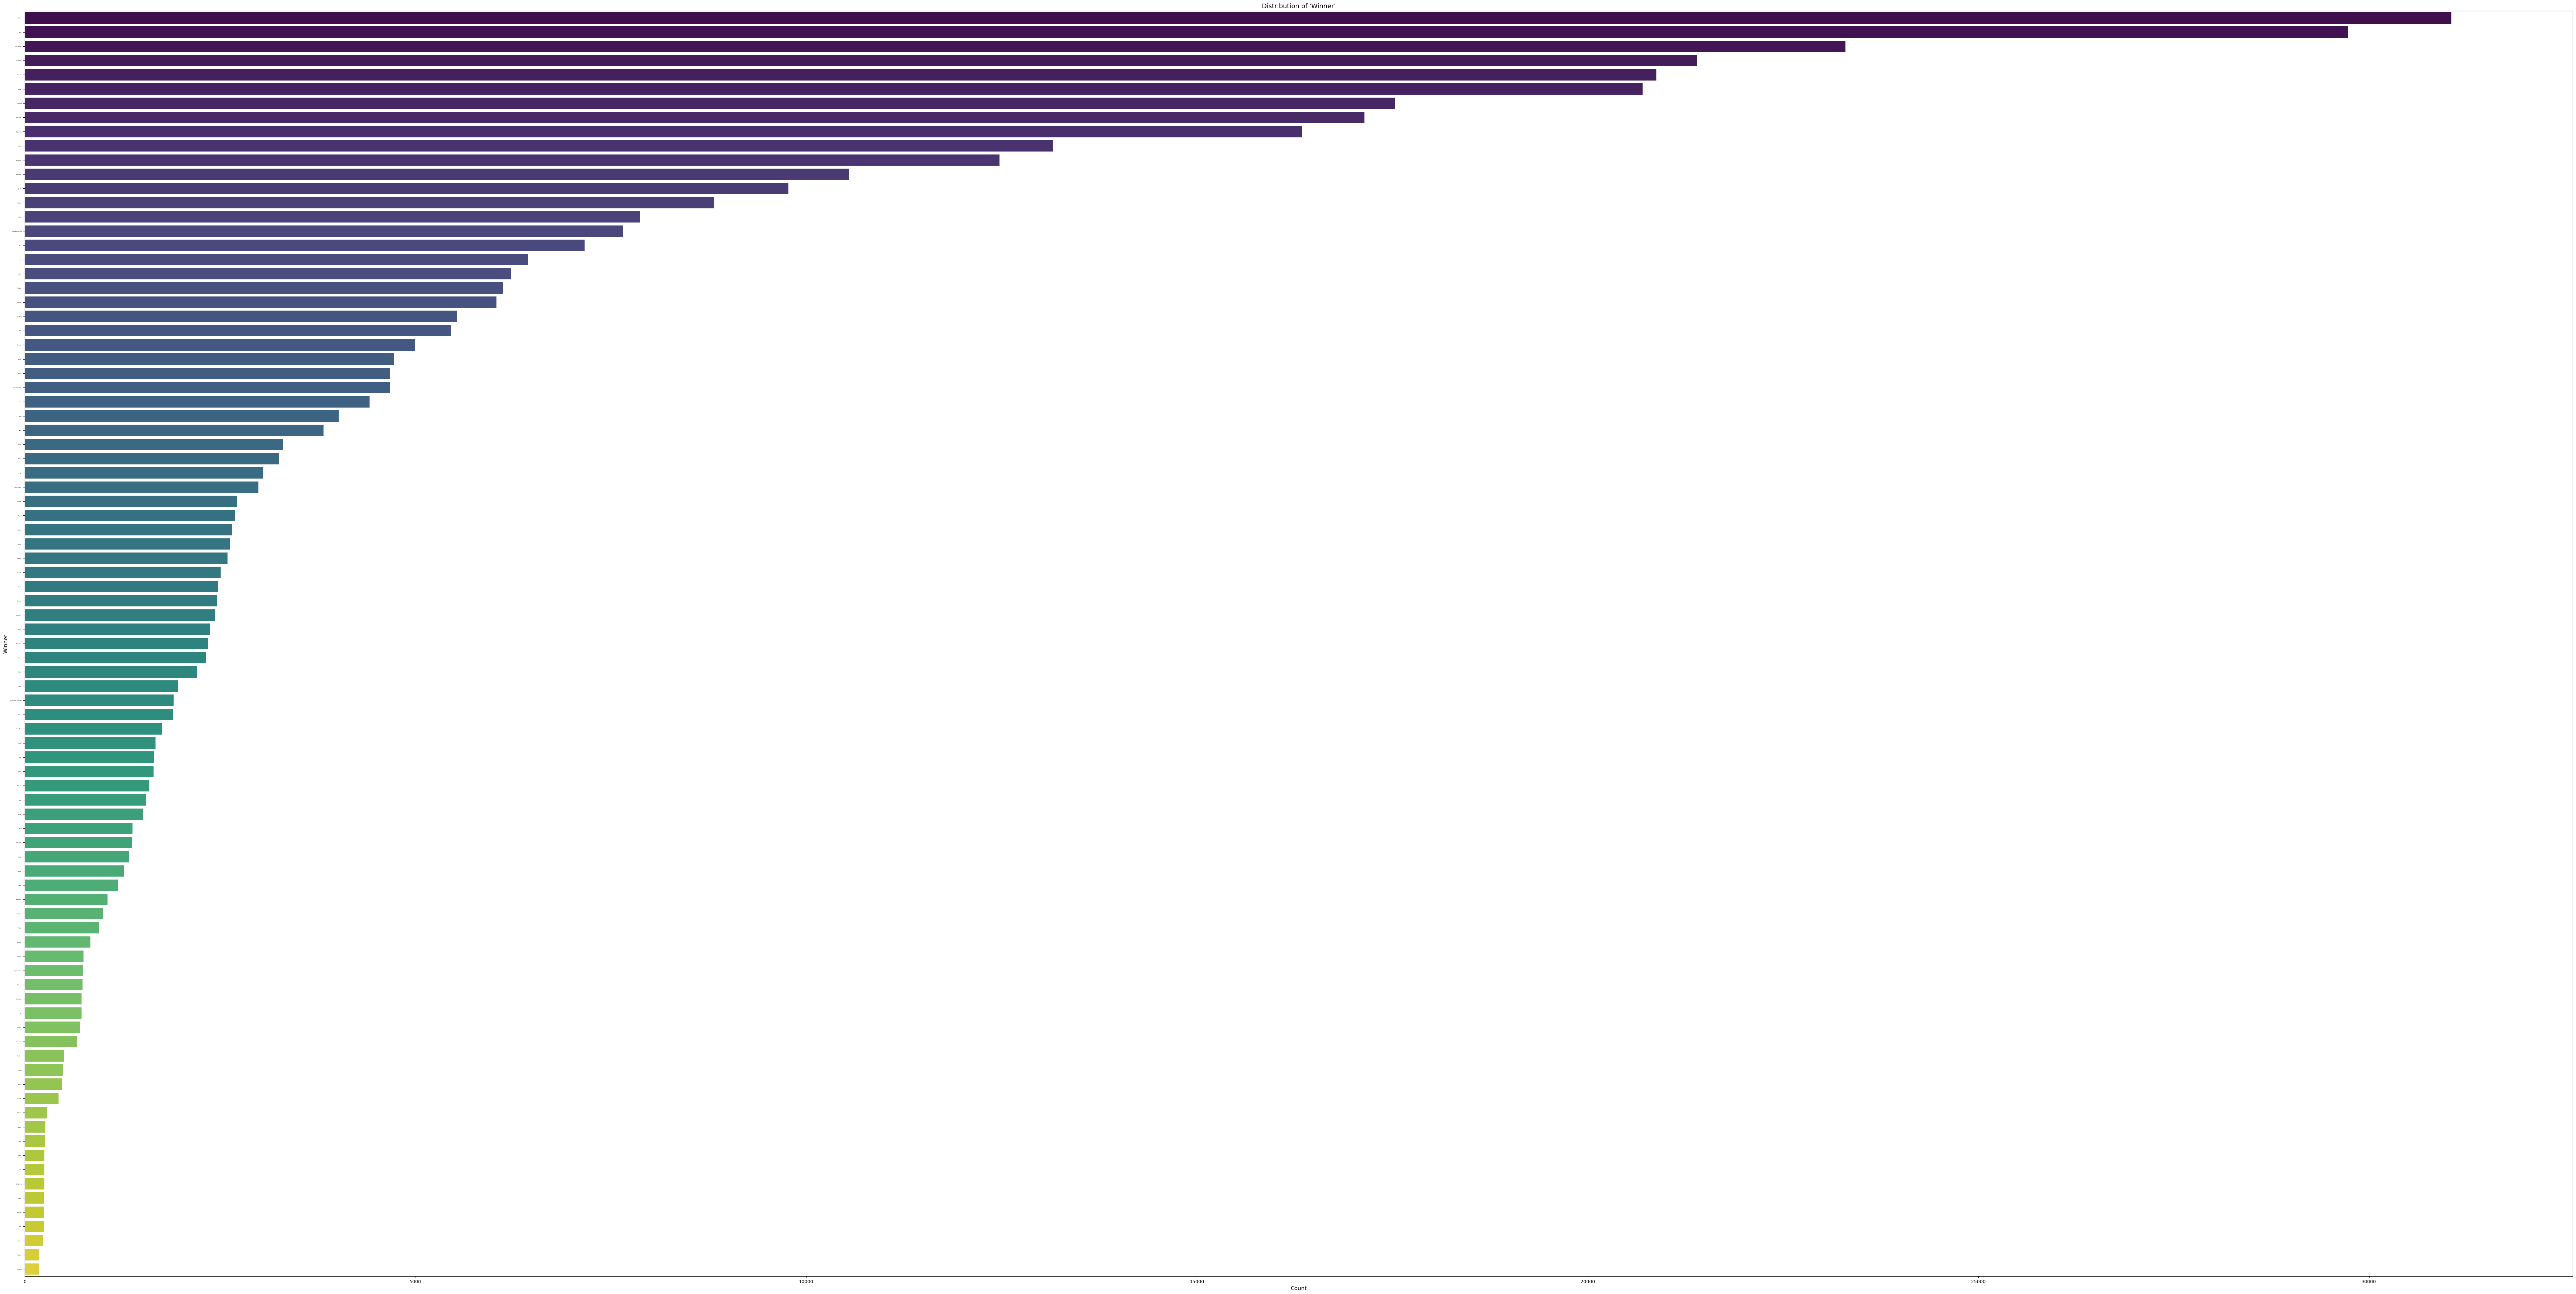

In [10]:
# check Distribution for target feature (balancing)

distribution_check = df['Winner'].value_counts()

print("Distribution of Target Feature:")
print(distribution_check)

# Visualization
plt.figure(figsize=(100, 50))
sns.countplot(y=df['Winner'], order=df['Winner'].value_counts().index, palette='viridis')
plt.title("Distribution of 'Winner'", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Winner", fontsize=12)
plt.tick_params(axis='y', labelsize=2)  # Reduce the font size of y-axis labels
plt.show()

In [11]:
# Distribution check for all categorical column

for n in categorical_columns:    
    print(f"Distribution of {n}:\n",df[n].value_counts())


Distribution of Date:
 Date
7/15/2022     1848
10/17/2021    1830
10/20/2021    1749
10/21/2021    1708
10/19/2021    1693
              ... 
7/24/2019      109
1/30/2016      100
11/7/2017       99
3/24/2014       96
3/12/2014       88
Name: count, Length: 1115, dtype: int64
Distribution of Venue:
 Venue
Dubai International Cricket Stadium                        20388
Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1)    14884
Shere Bangla National Stadium                              12443
Marsa Sports Club                                          11584
Sheikh Zayed Stadium                                       10362
                                                           ...  
Wanderers                                                    227
Sky Stadium                                                  222
Sportpark Maarschalkerweerd                                  221
OUTsurance Oval                                              219
Solvangs Park                              

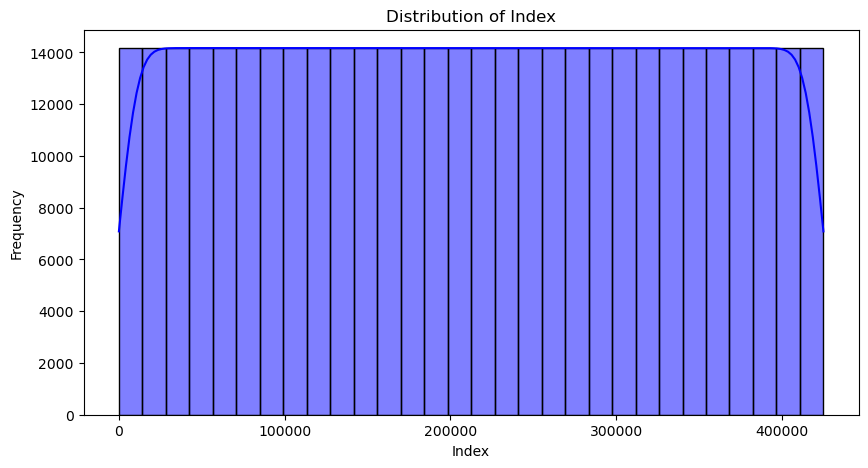

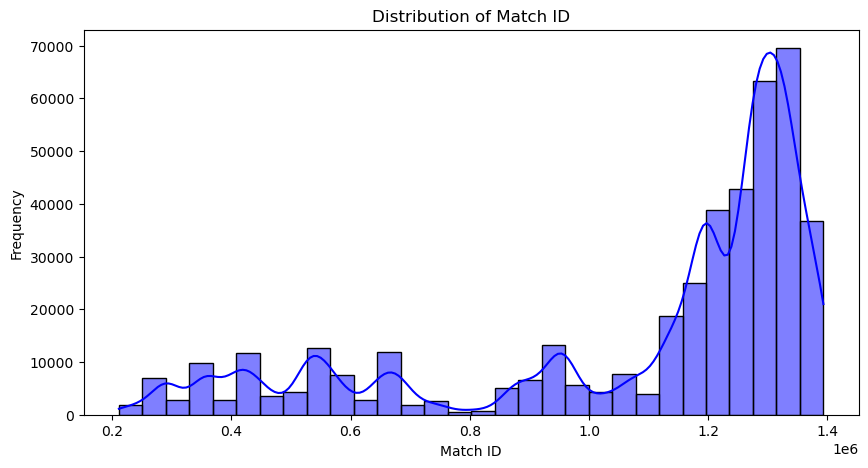

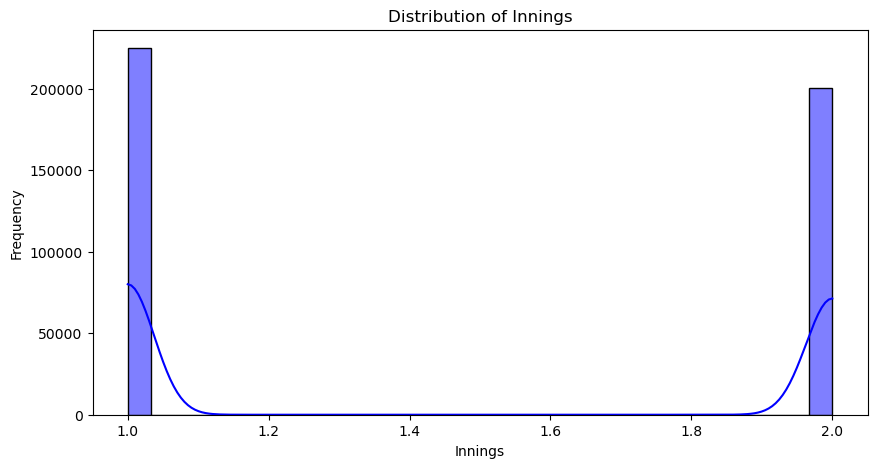

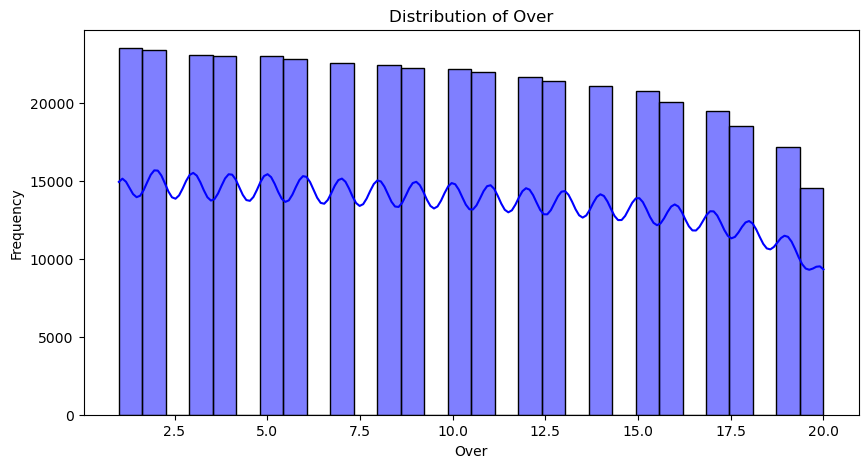

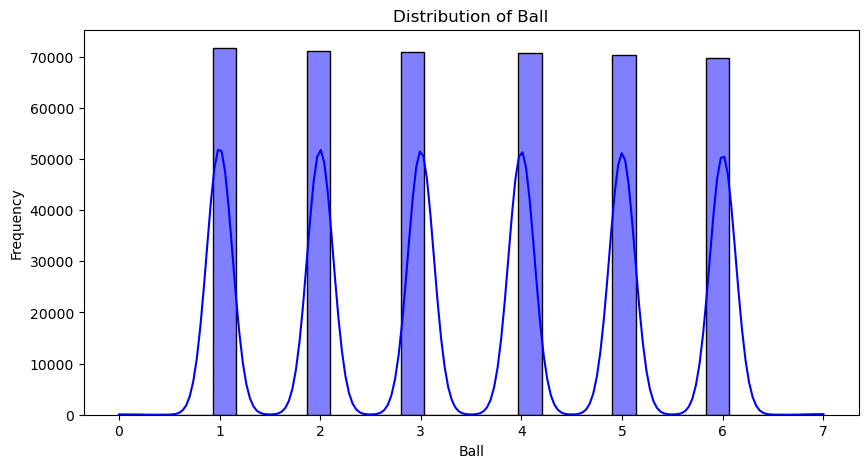

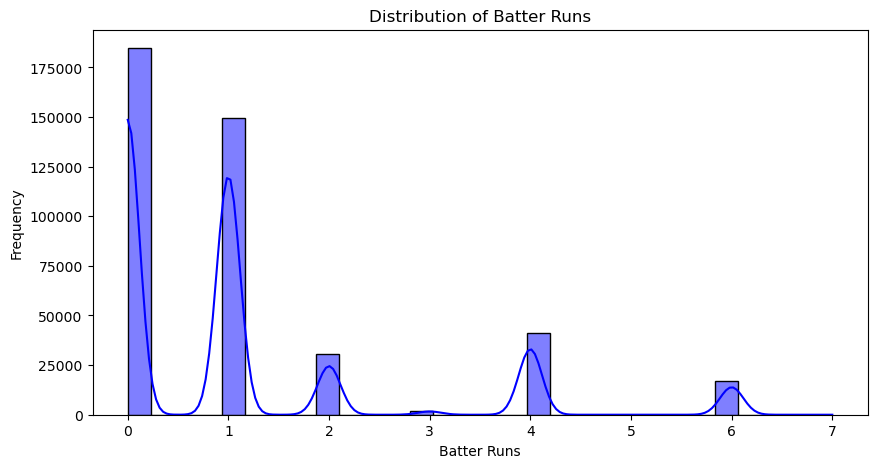

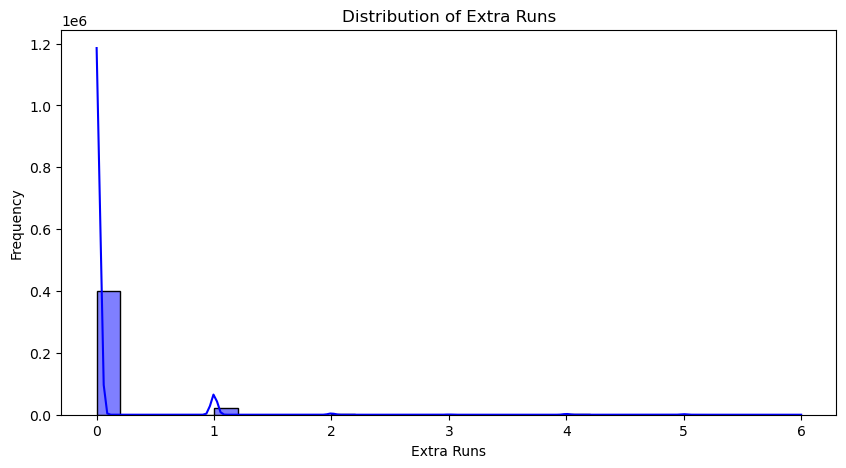

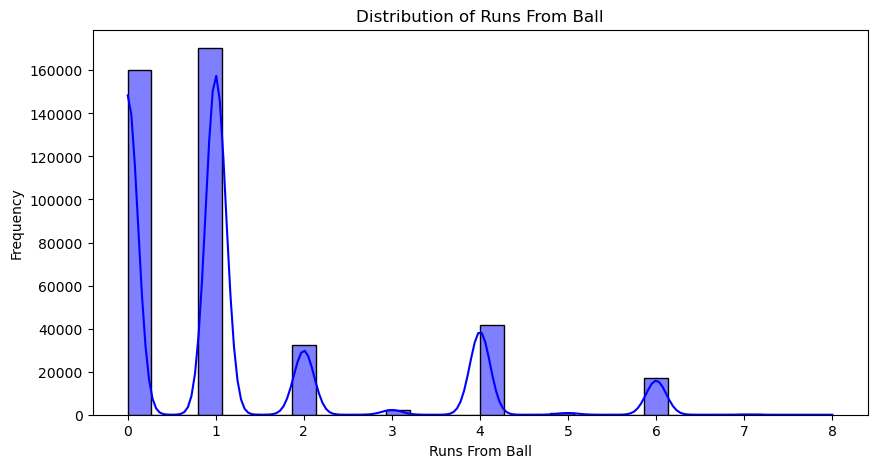

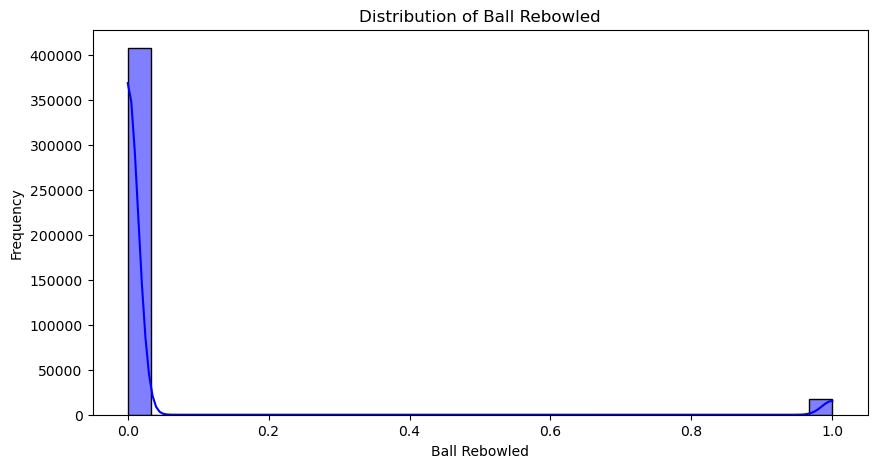

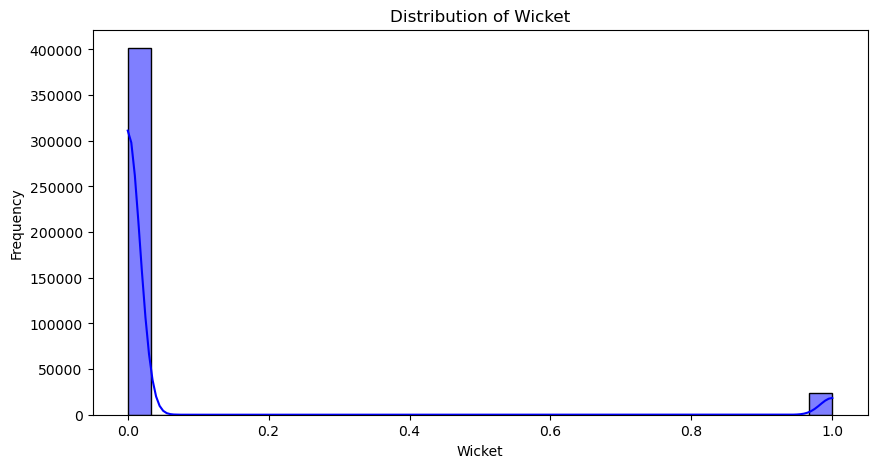

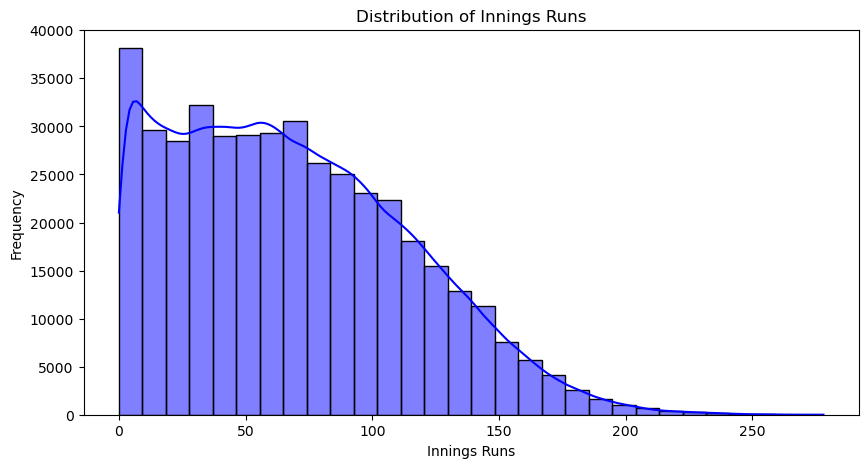

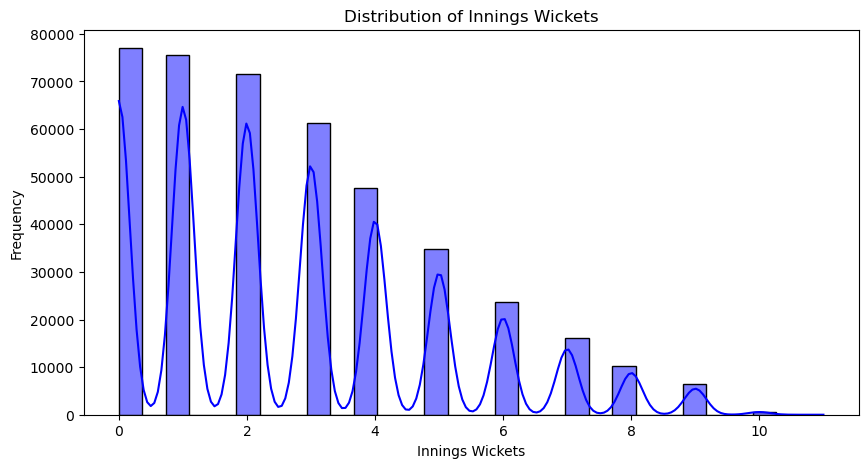

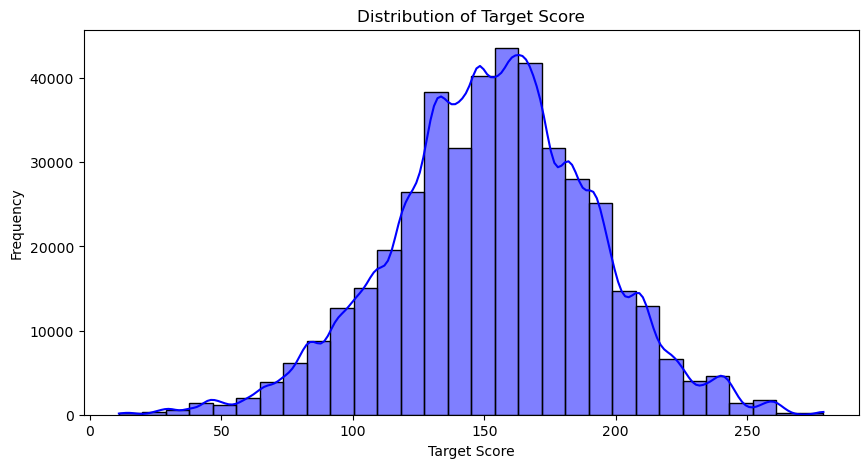

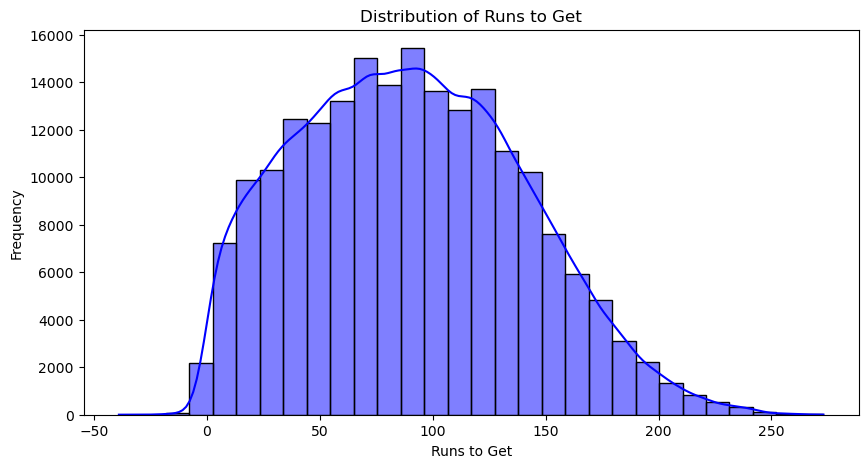

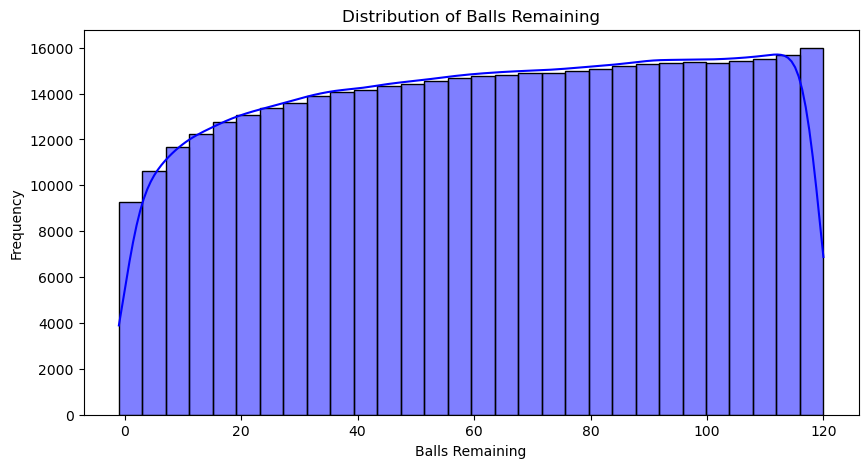

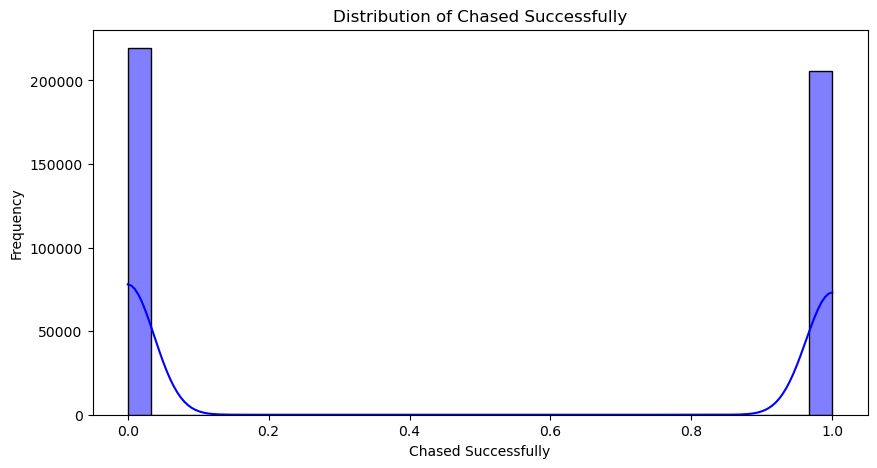

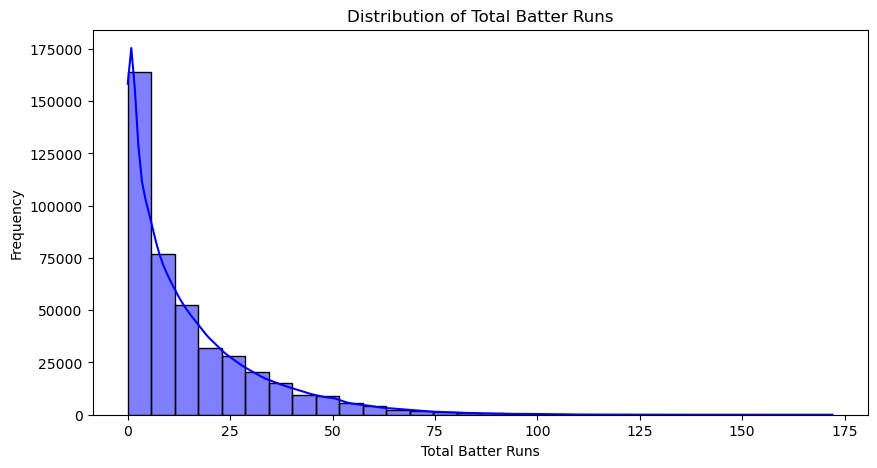

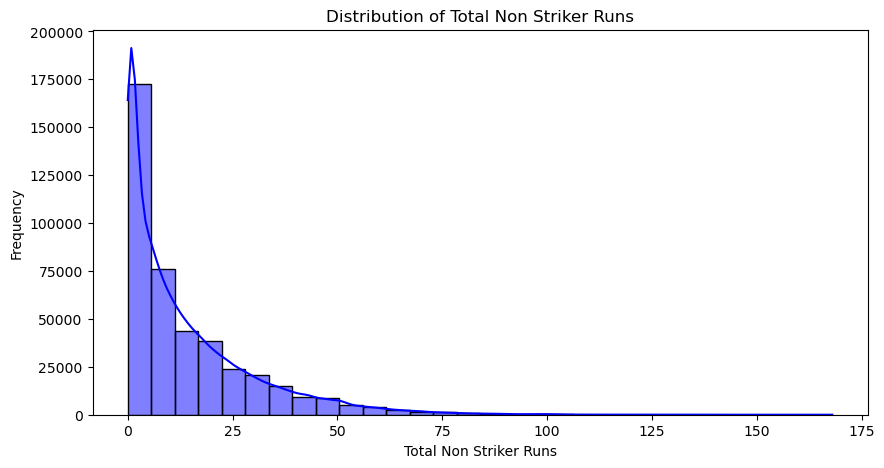

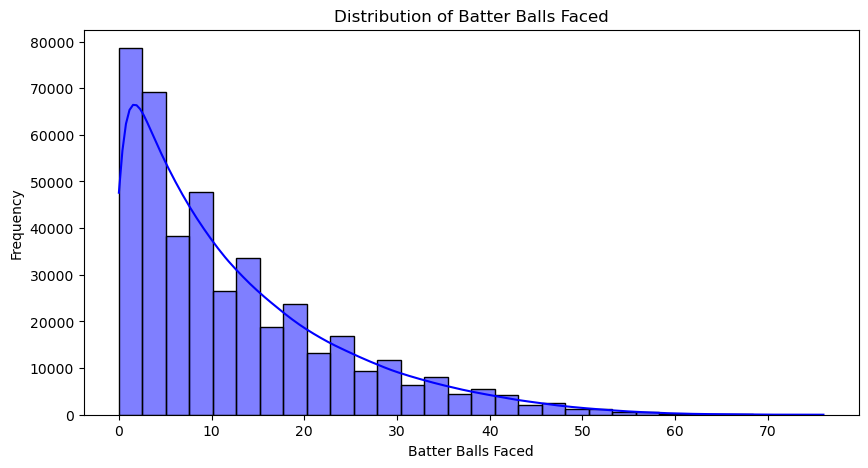

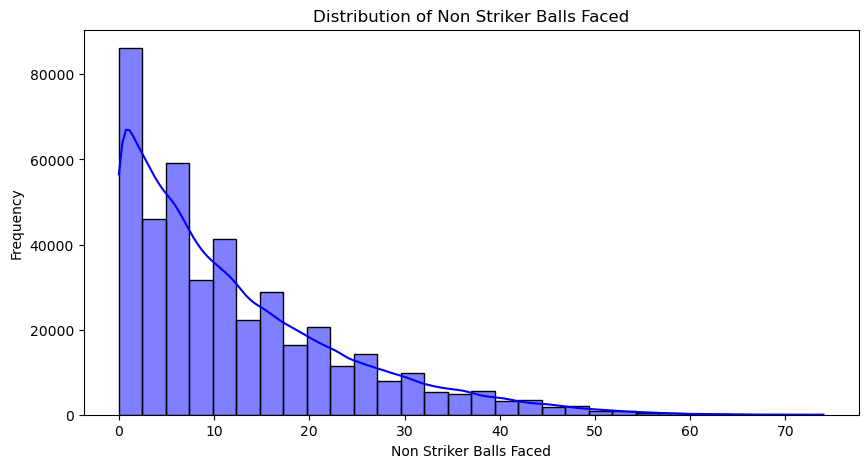

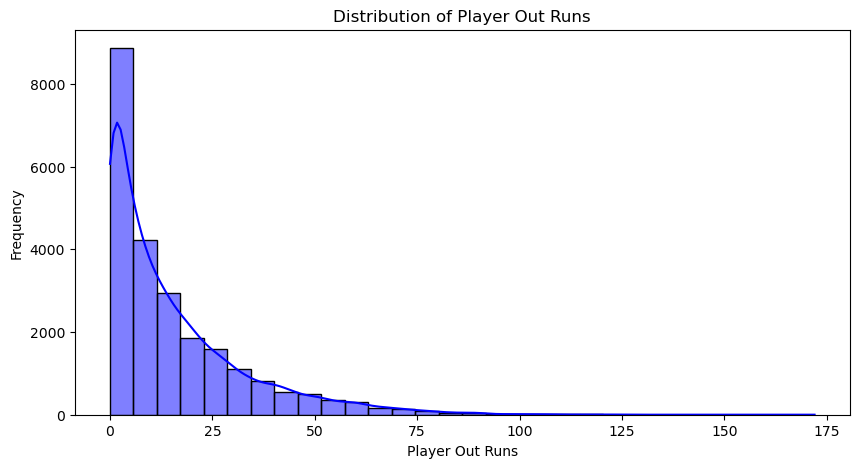

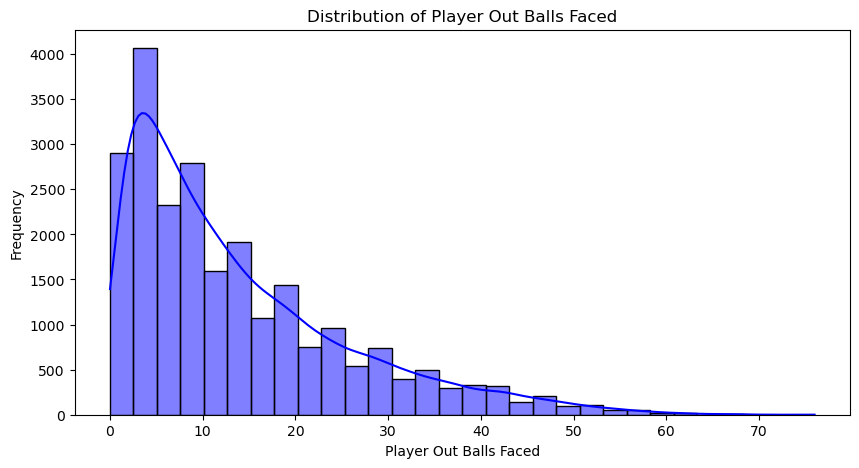

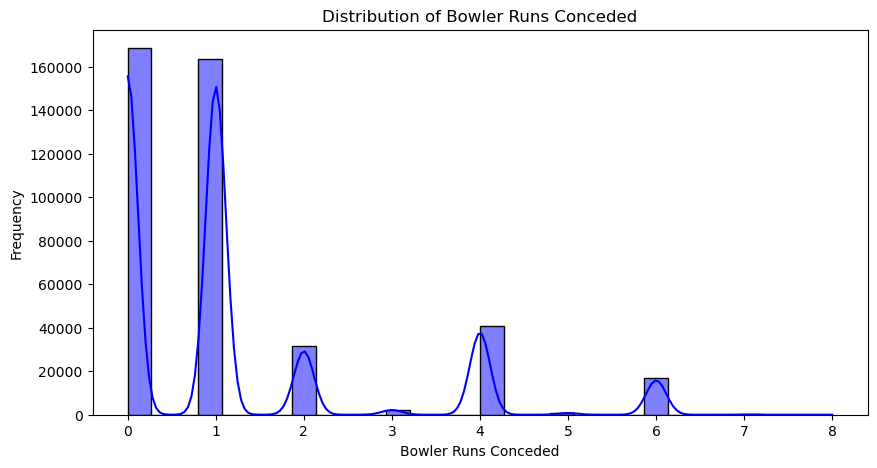

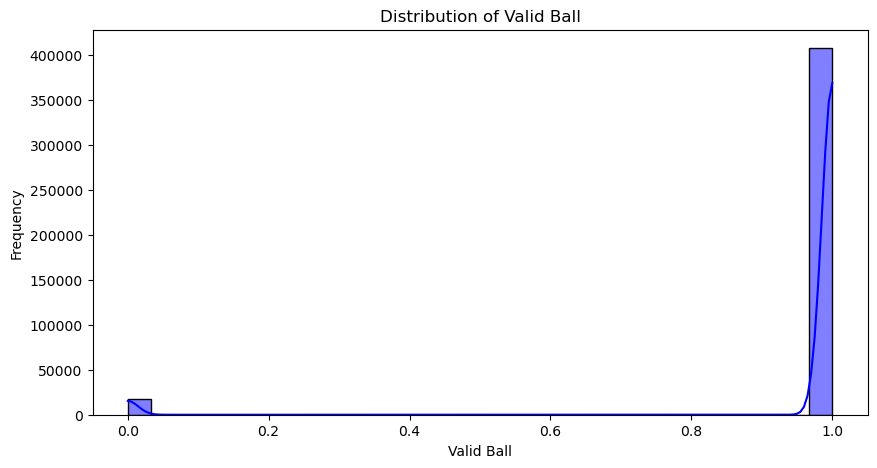

In [12]:
# Distribution check for all numerical columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

*****Dataset Cleaning*****

In [13]:
(df.isnull().sum()/df.shape[0])*100

Index                       0.000000
Match ID                    0.000000
Date                        0.000000
Venue                       0.000000
Bat First                   0.000000
Bat Second                  0.000000
Innings                     0.000000
Over                        0.000000
Ball                        0.000000
Batter                      0.000000
Non Striker                 0.000000
Bowler                      0.000000
Batter Runs                 0.000000
Extra Runs                  0.000000
Runs From Ball              0.000000
Ball Rebowled               0.000000
Extra Type                  0.000000
Wicket                      0.000000
Method                     94.434735
Player Out                 94.434735
Innings Runs                0.000000
Innings Wickets             0.000000
Target Score                0.000000
Runs to Get                52.882840
Balls Remaining             0.000000
Winner                      0.000000
Chased Successfully         0.000000
T

In [14]:
# Dropping Features with 70% or more null values

df=pd.read_csv('ball_by_ball_it20.csv')

for i in df.columns:
    if((df[i].isnull().sum()/df.shape[0])*100>70):
        df.drop(i,inplace=True,axis=1)
    
print("Feature has been droped having 70% or greater than NULL values.")

Feature has been droped having 70% or greater than NULL values.


In [15]:
# Check dimensions

df.shape

(425119, 31)

In [16]:
# All columns/features

df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Bowler Runs Conceded',
       'Valid Ball'],
      dtype='object')

In [17]:
df.isnull().sum().sum()

# Total 224815 null values 

224815

In [18]:
df.isnull().sum()

# Only one feature = 'Runs to Get' have all 224815 NULL values

Index                           0
Match ID                        0
Date                            0
Venue                           0
Bat First                       0
Bat Second                      0
Innings                         0
Over                            0
Ball                            0
Batter                          0
Non Striker                     0
Bowler                          0
Batter Runs                     0
Extra Runs                      0
Runs From Ball                  0
Ball Rebowled                   0
Extra Type                      0
Wicket                          0
Innings Runs                    0
Innings Wickets                 0
Target Score                    0
Runs to Get                224815
Balls Remaining                 0
Winner                          0
Chased Successfully             0
Total Batter Runs               0
Total Non Striker Runs          0
Batter Balls Faced              0
Non Striker Balls Faced         0
Bowler Runs Co

In [19]:
# Check all columns having null values

null_columns=[]
for i in df.columns:
    if df[i].isnull().sum() != 0 :
        null_columns.append(i)

In [20]:
null_columns

['Runs to Get']

<Axes: xlabel='Runs to Get', ylabel='Count'>

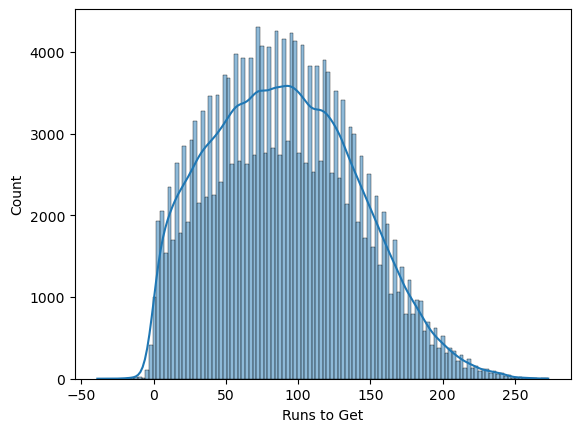

In [21]:
# Visualize the feature ['Runs to Get']

sns.histplot(x=df['Runs to Get'],kde=True)

****Since 'Runs to Get' is normally distributed (no skewness) the mean will be best to fill the null values.****

In [22]:
# Mean of ['Runs to Get']

mean_value = df['Runs to Get'].mean()
print("Mean value for 'Runs to Get' column: ", mean_value)

# Fill null values with the mean

df['Runs to Get'].fillna(mean_value, inplace=True)

Mean value for 'Runs to Get' column:  90.19706046808851


In [23]:
# Check the null values again (should be zero)

print("NULL values in 'Runs to Get' column: ",df['Runs to Get'].isnull().sum())

NULL values in 'Runs to Get' column:  0


In [24]:
# Dataset has been cleaned from null values

df.isnull().sum()

Index                      0
Match ID                   0
Date                       0
Venue                      0
Bat First                  0
Bat Second                 0
Innings                    0
Over                       0
Ball                       0
Batter                     0
Non Striker                0
Bowler                     0
Batter Runs                0
Extra Runs                 0
Runs From Ball             0
Ball Rebowled              0
Extra Type                 0
Wicket                     0
Innings Runs               0
Innings Wickets            0
Target Score               0
Runs to Get                0
Balls Remaining            0
Winner                     0
Chased Successfully        0
Total Batter Runs          0
Total Non Striker Runs     0
Batter Balls Faced         0
Non Striker Balls Faced    0
Bowler Runs Conceded       0
Valid Ball                 0
dtype: int64

*****Dropping Duplicates***** 

In [25]:
# Count duplicate rows

num_duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {num_duplicates}')

# No any duplicated data found

Total duplicate rows: 0


In [26]:
# Removing Outliers

def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers_iqr(df, col)

print("Outliers removed from numerical columns.")

Outliers removed from numerical columns.


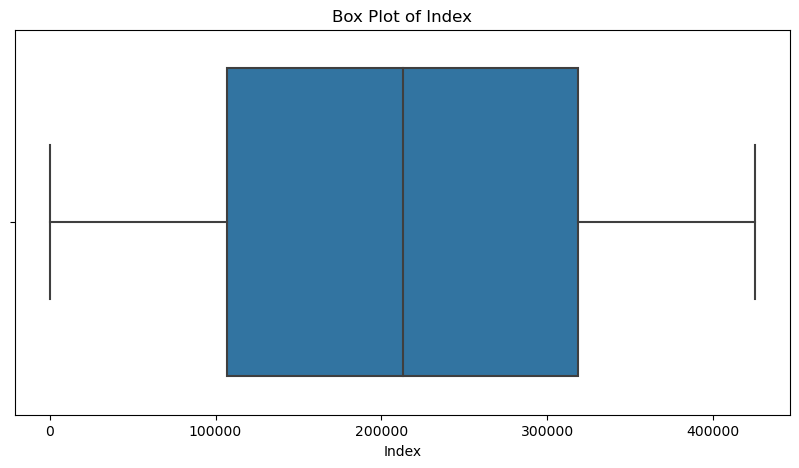

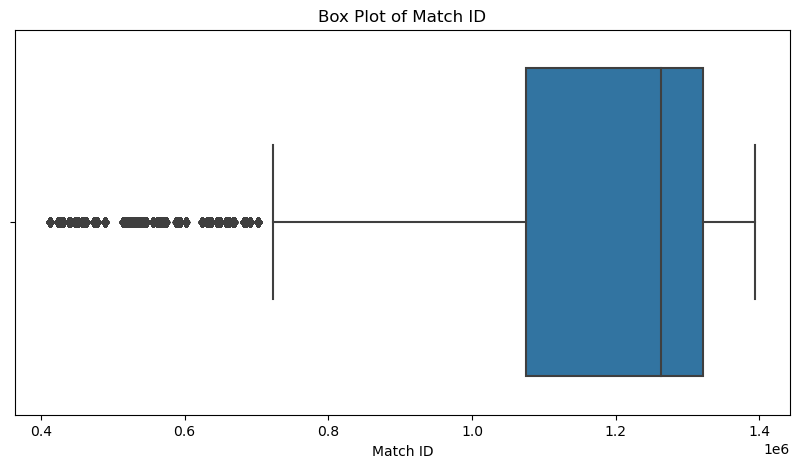

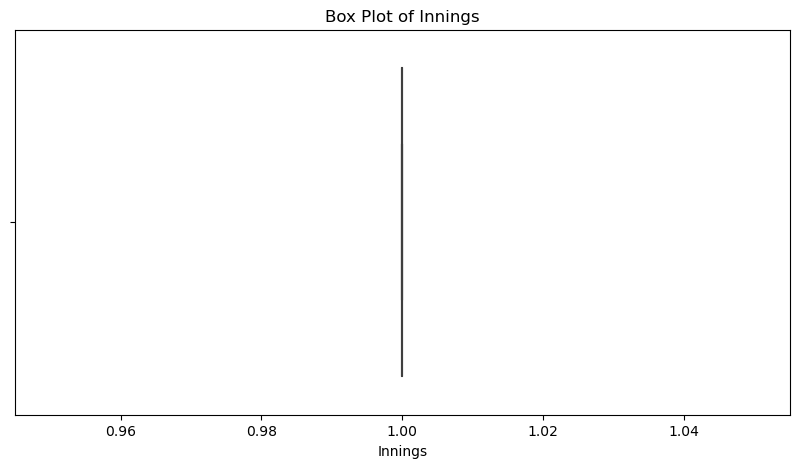

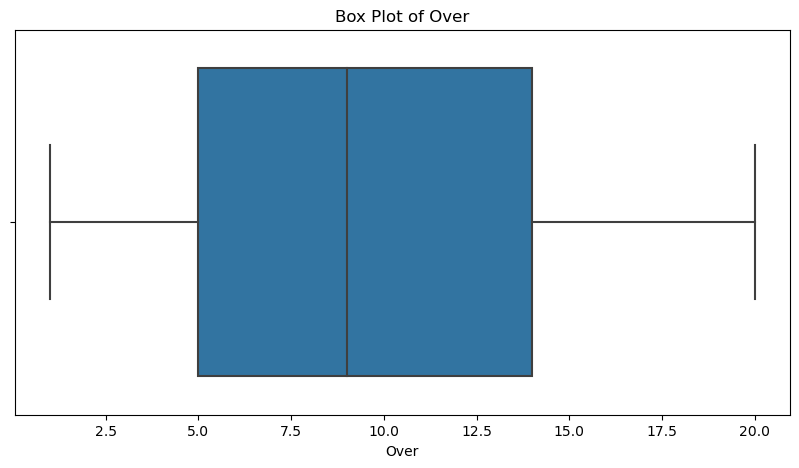

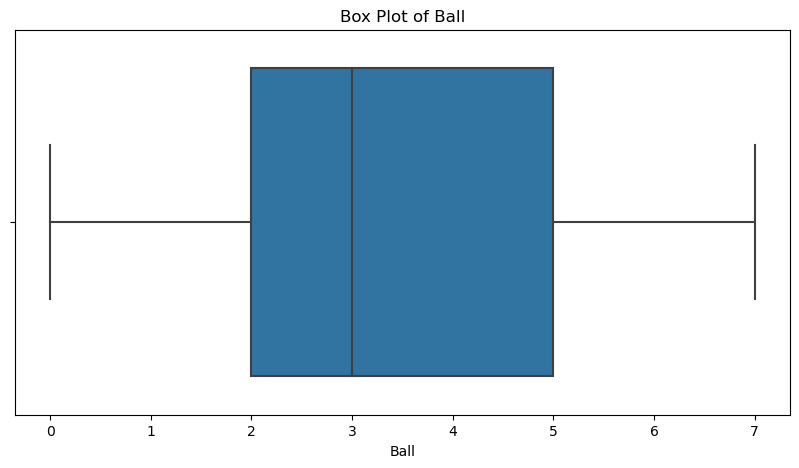

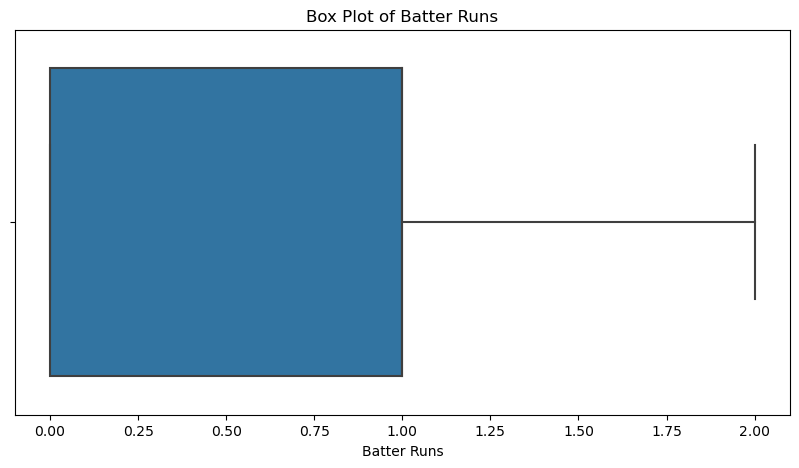

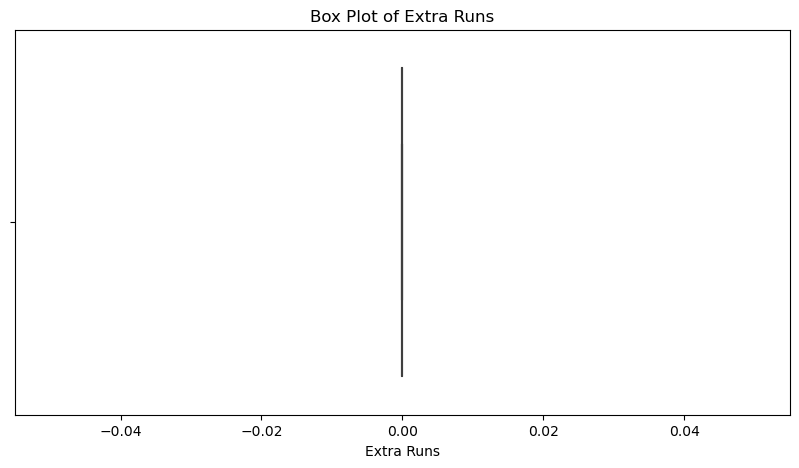

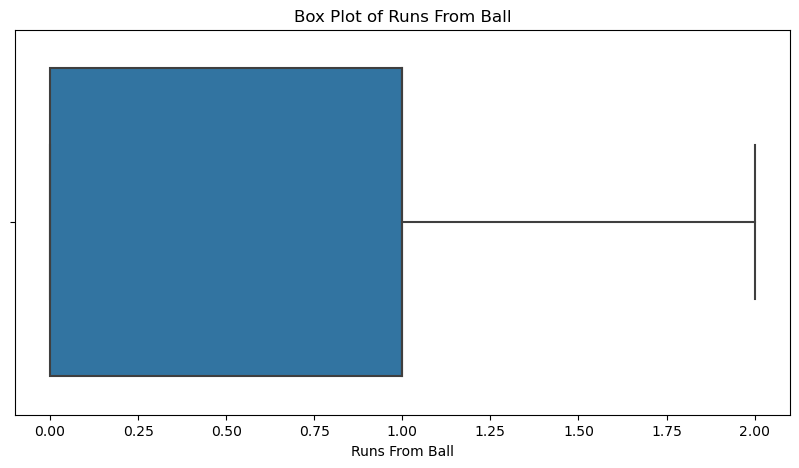

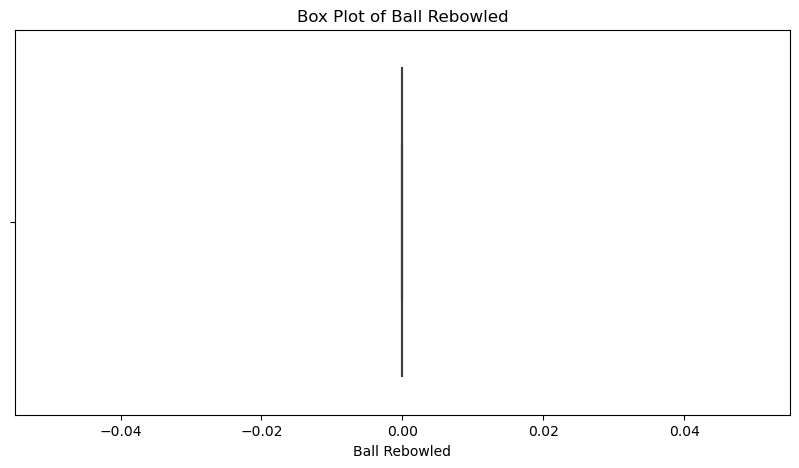

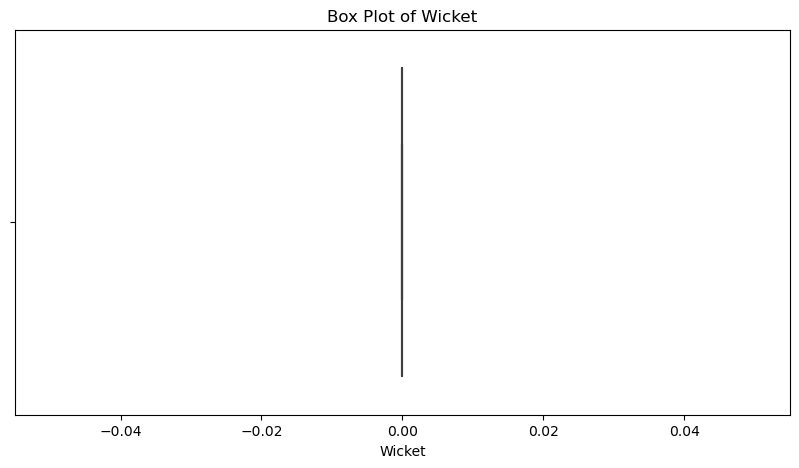

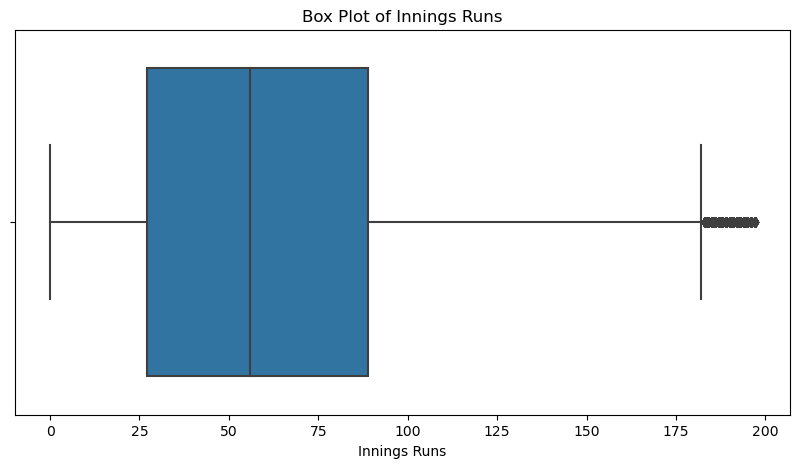

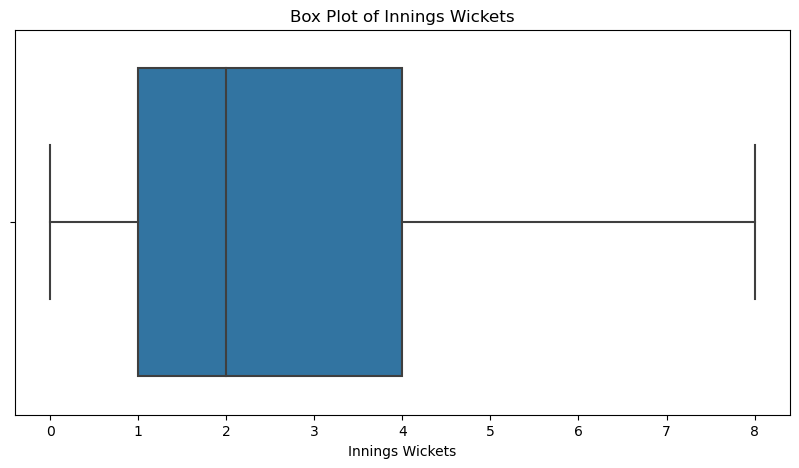

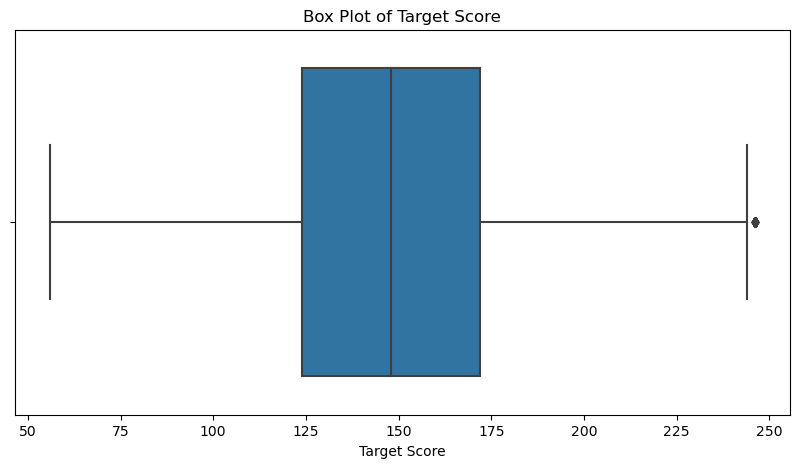

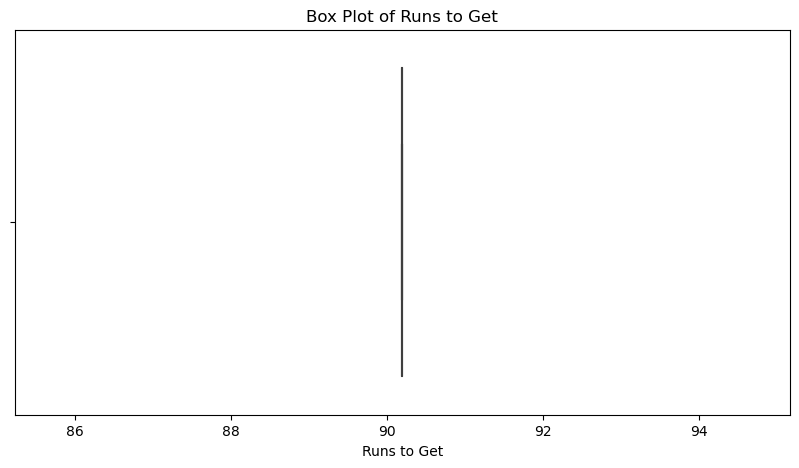

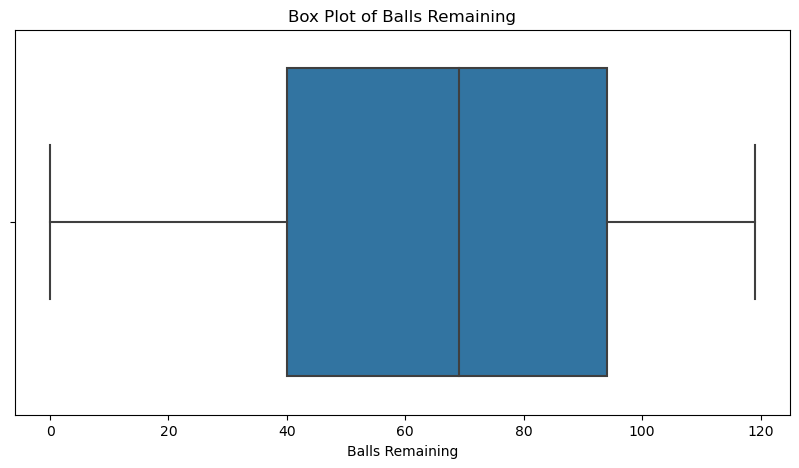

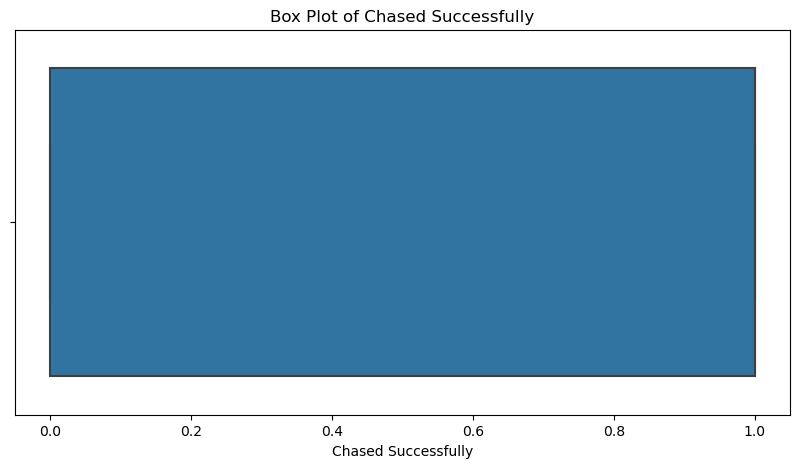

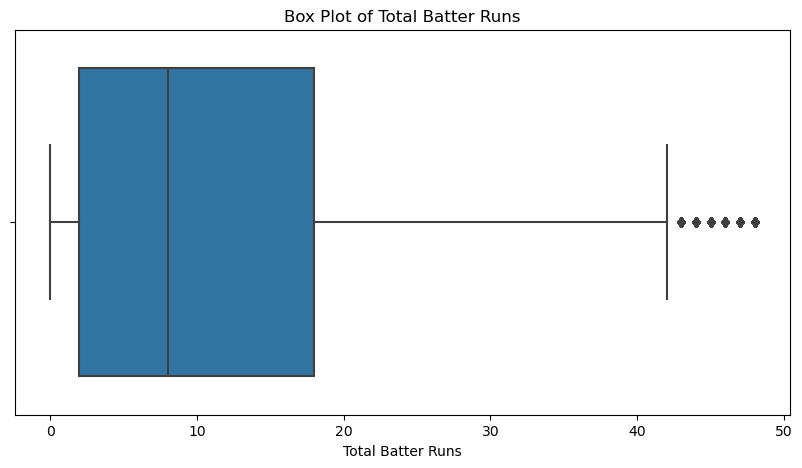

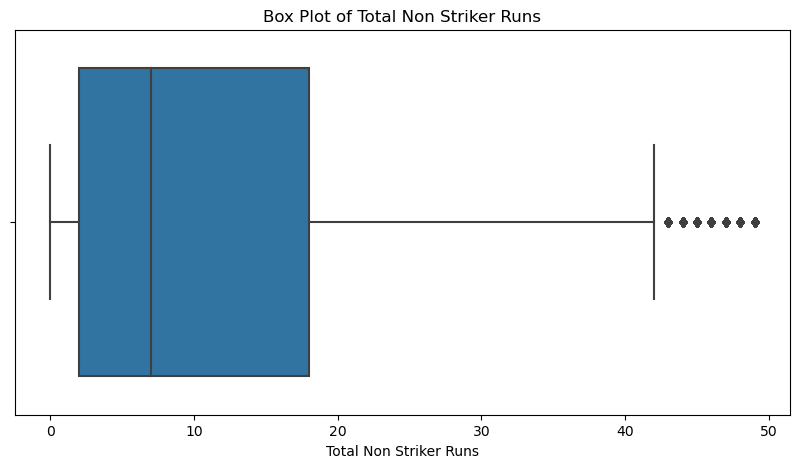

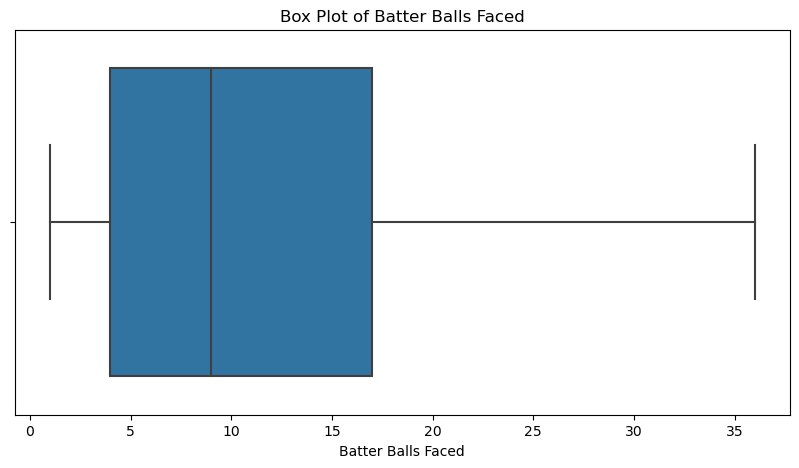

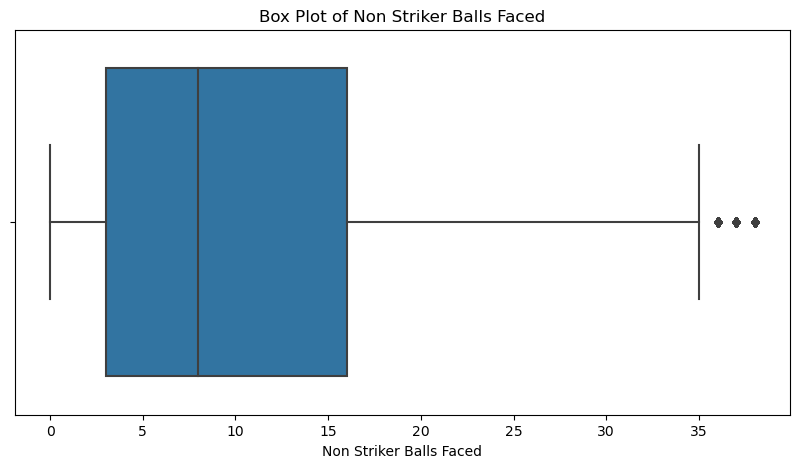

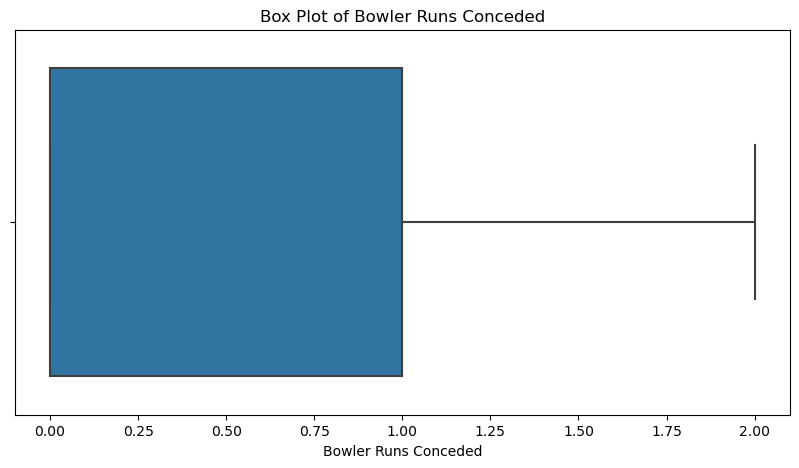

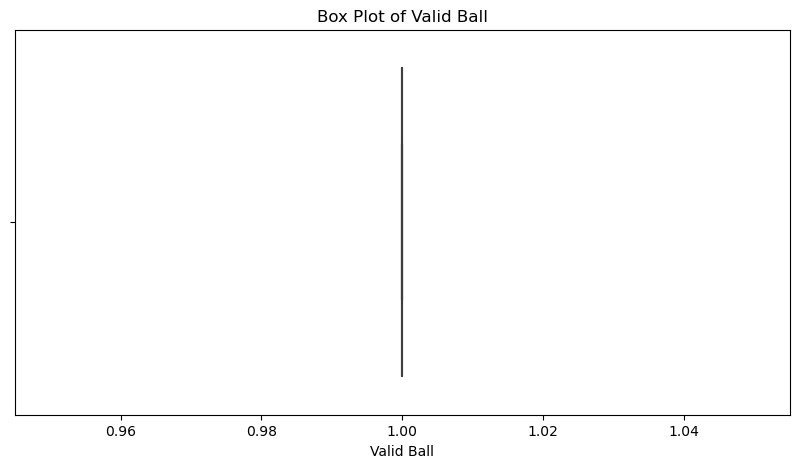

In [27]:
# Box plots

for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [28]:
# Function to cap extreme values at the lower and upper bound

def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at the bounds
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping to all numerical columns

for col in df.select_dtypes(include=[np.number]).columns:
    df = cap_outliers(df, col)

print("Extreme values capped in numerical columns.")

Extreme values capped in numerical columns.


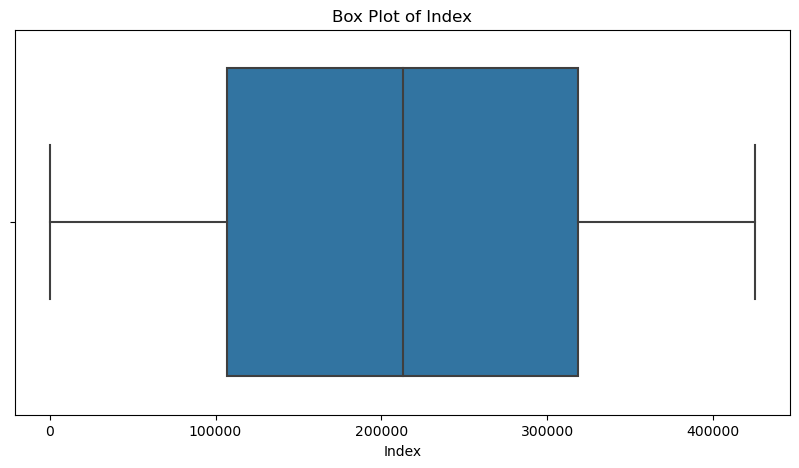

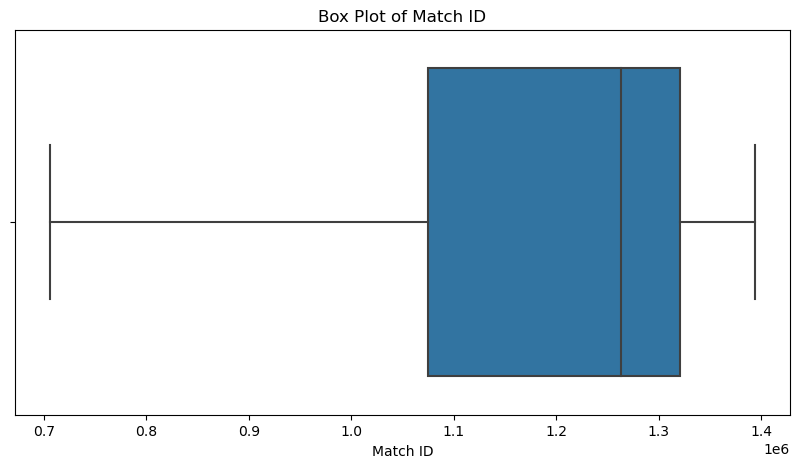

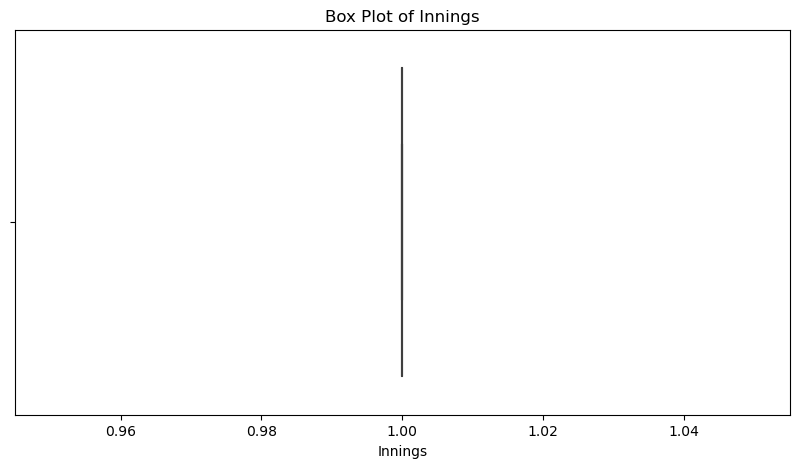

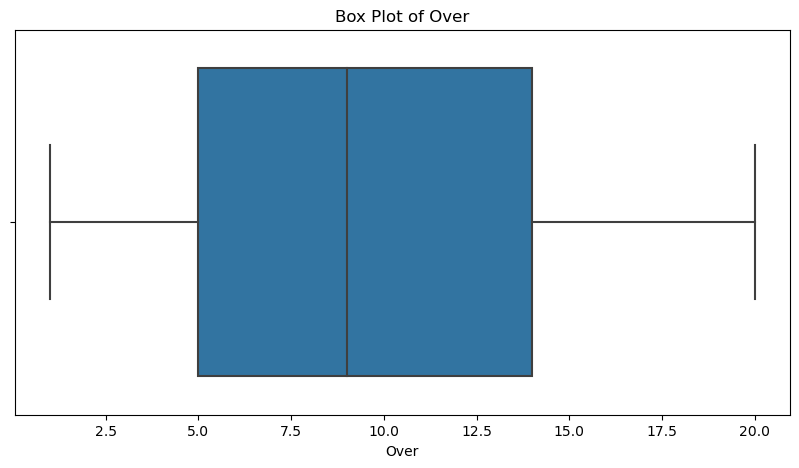

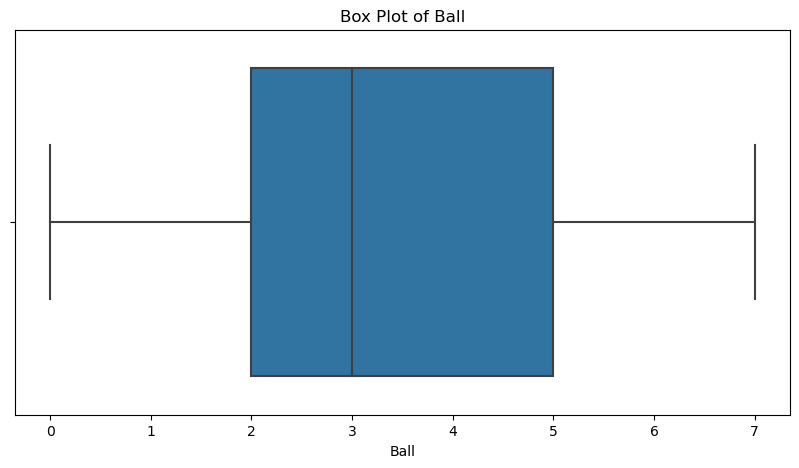

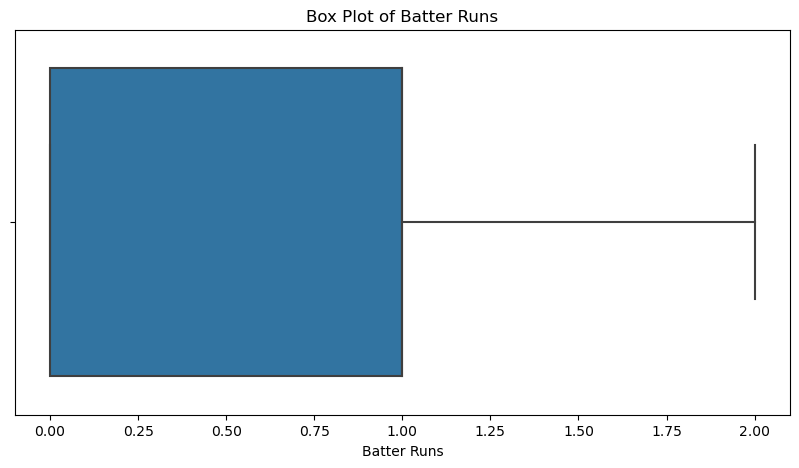

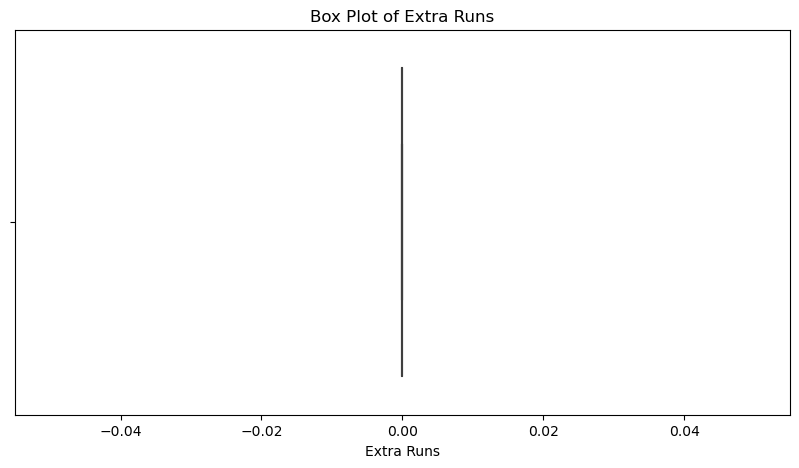

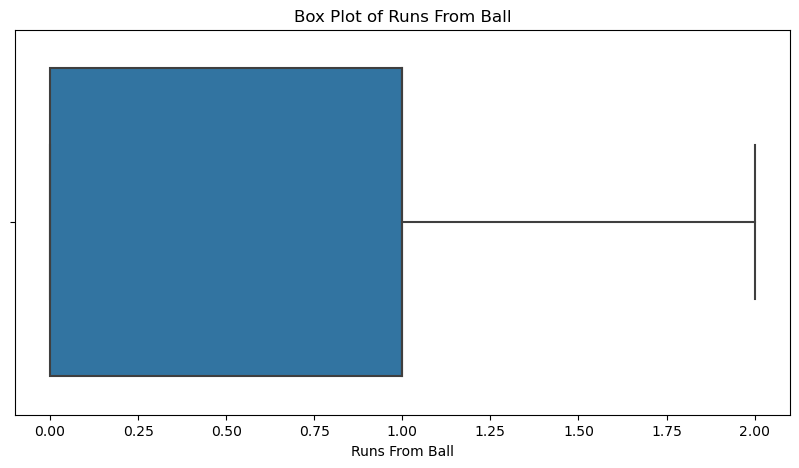

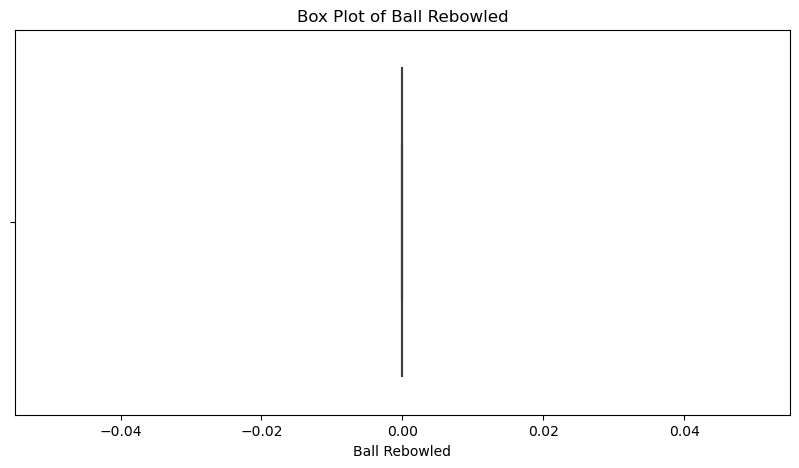

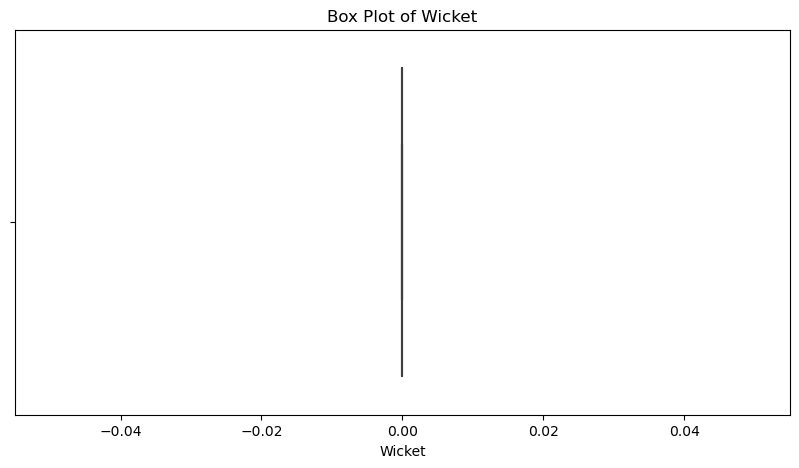

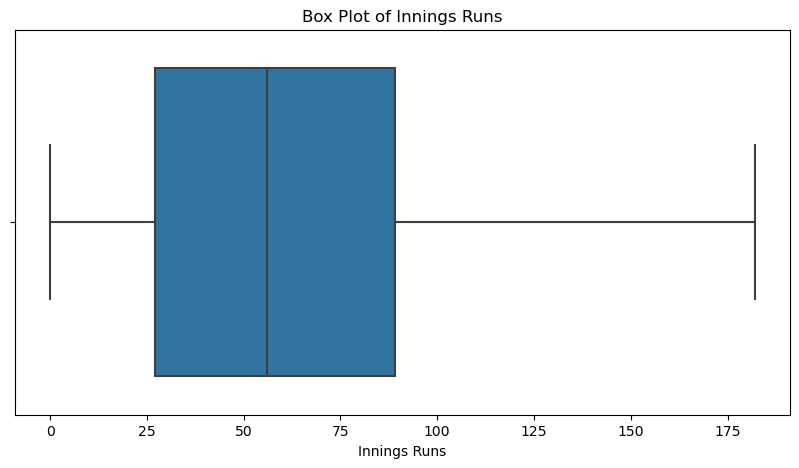

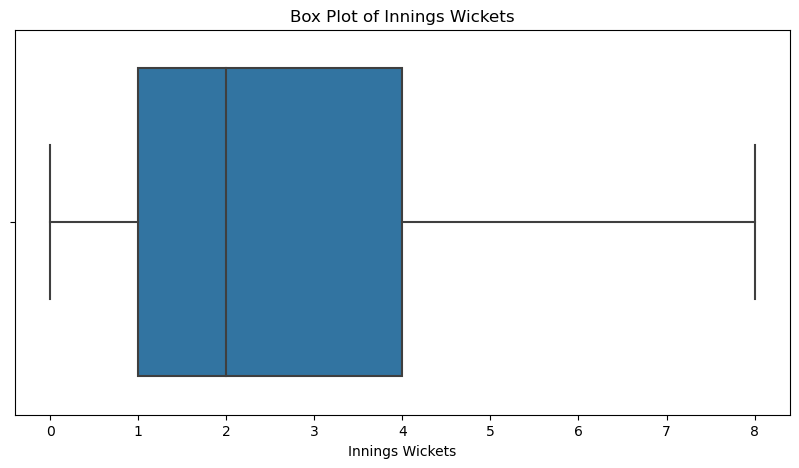

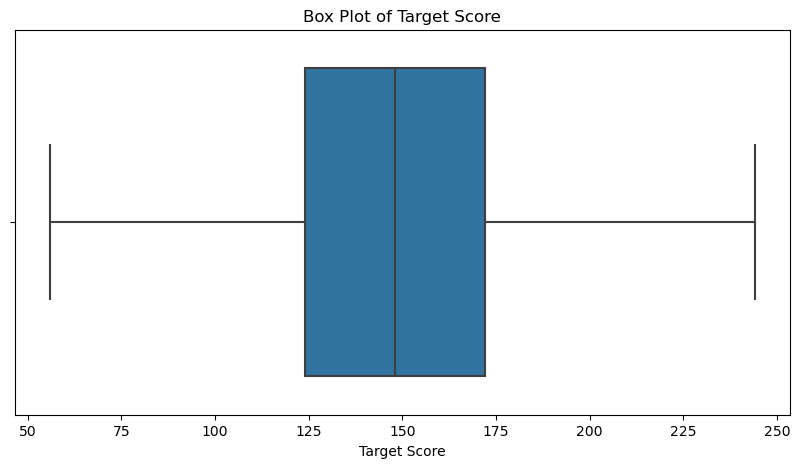

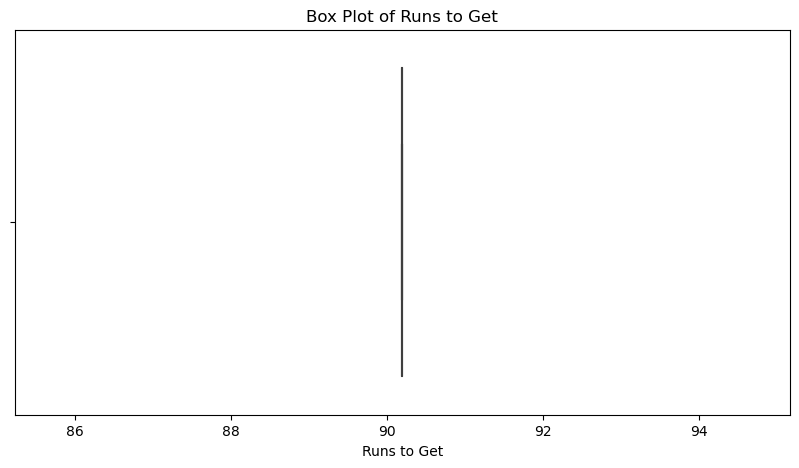

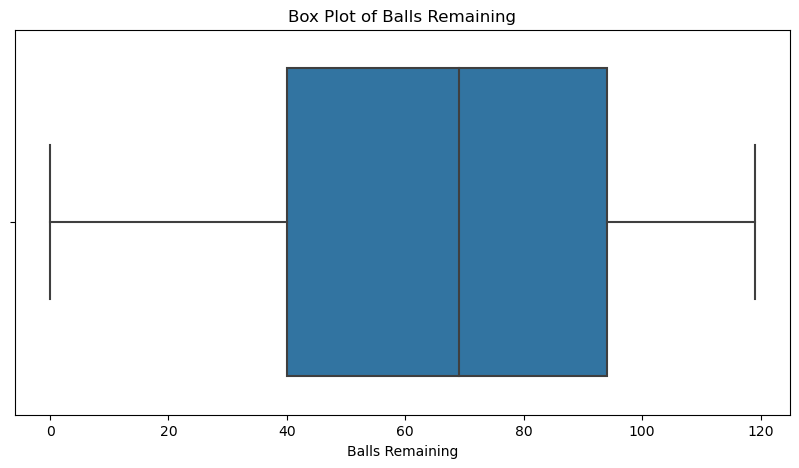

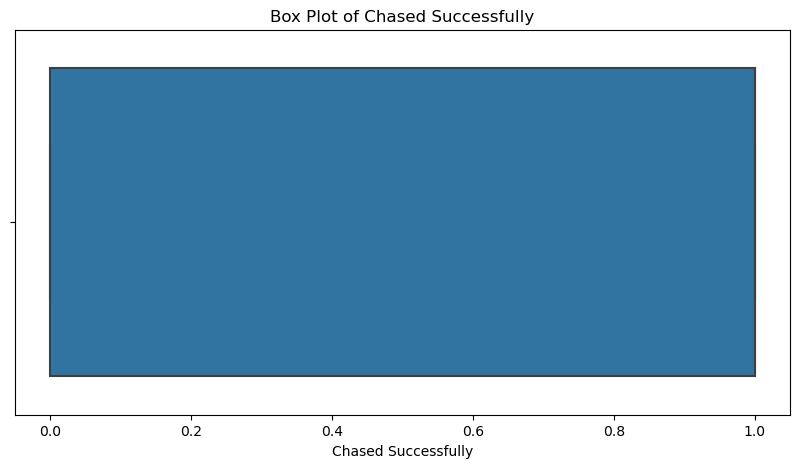

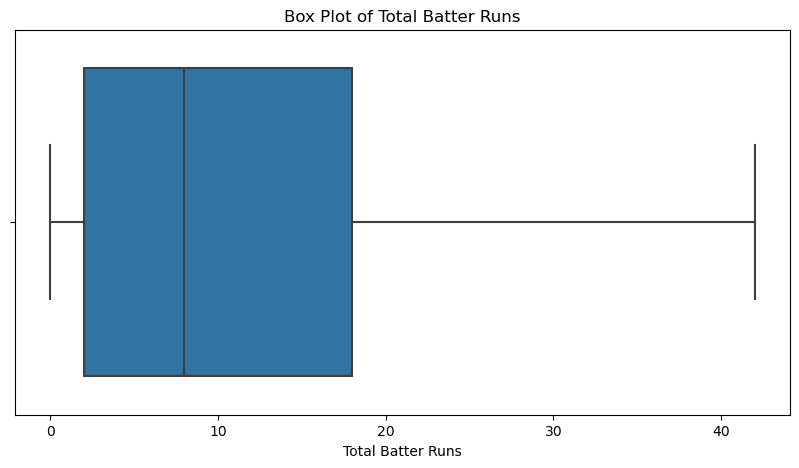

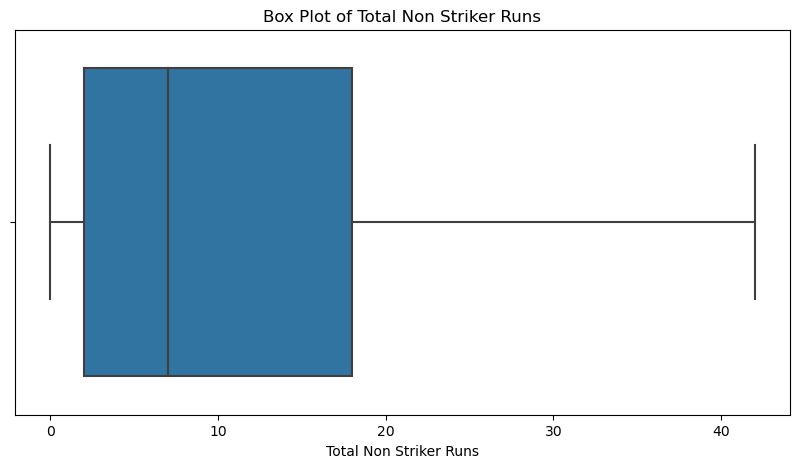

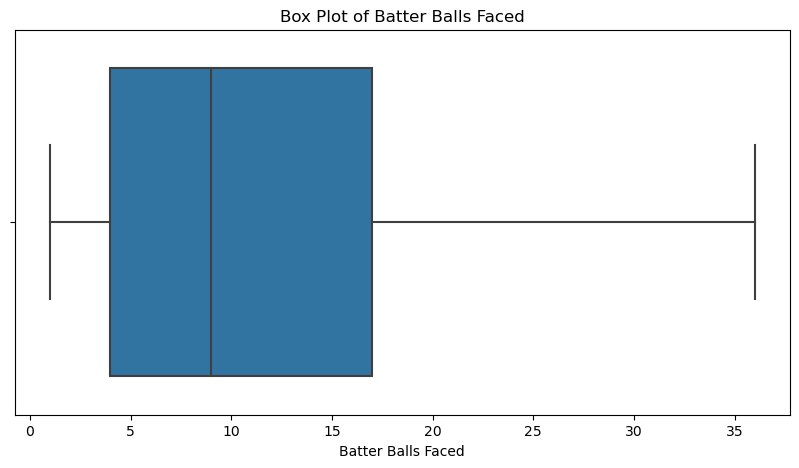

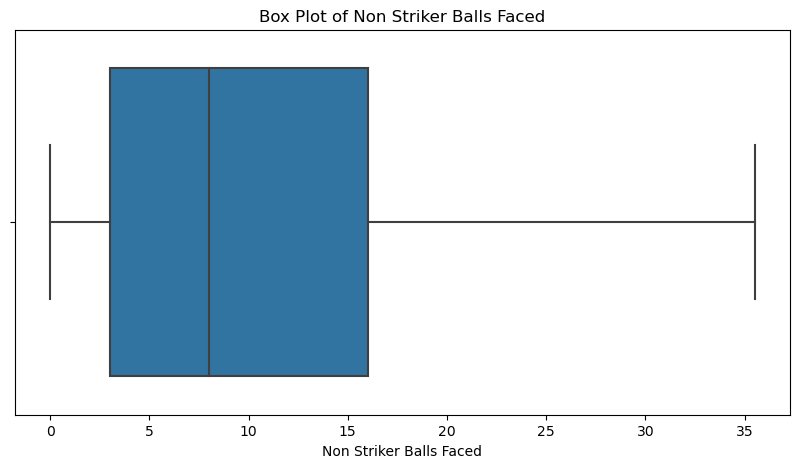

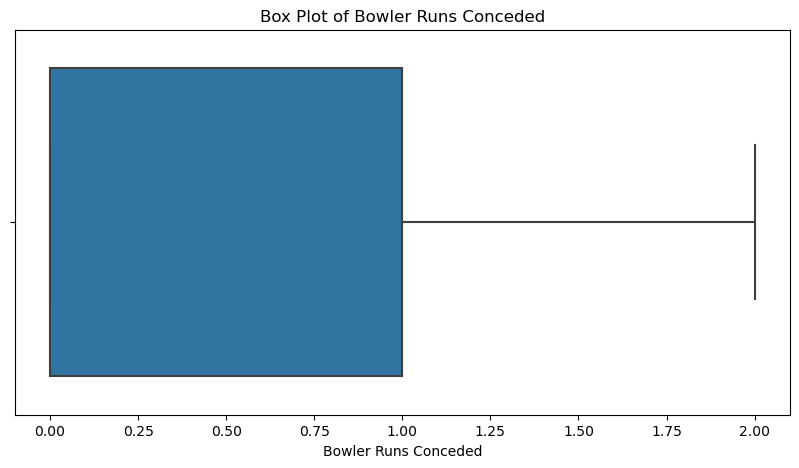

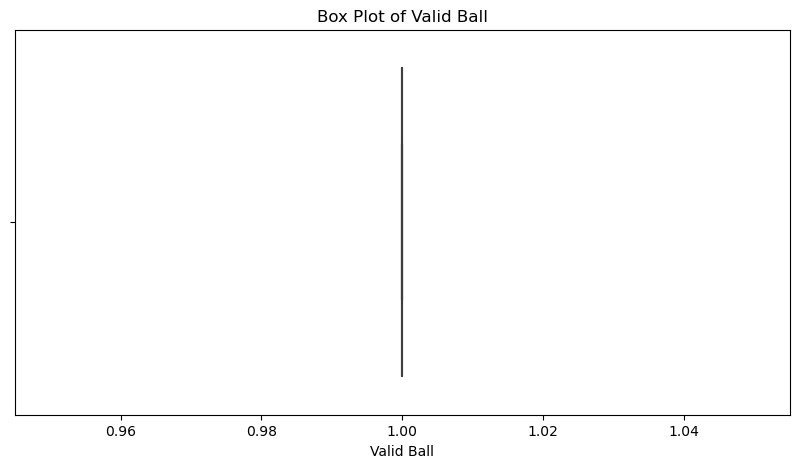

In [29]:
# Again visualize the box plots

for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Applying Models for Winner Prediction for Future Matches
  </span>
</div>

In [30]:
df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Bowler Runs Conceded',
       'Valid Ball'],
      dtype='object')

In [31]:
# Selected relevent feature for model

selected_features=df[['Bat First', 'Bat Second', 'Venue', 'Winner']]

In [32]:
# Split into X and y
# X => all features excluding target variable
# y => target feature only

X = selected_features.drop('Winner',axis=1)
y = selected_features['Winner']

In [33]:
# Label encoding on selected_features (Preprocessing)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()

for col in ['Venue', 'Bat First', 'Bat Second']:
    X[col] = label_encoder.fit_transform(X[col].astype(str)) # String type
    
display(selected_features)

,Bat First,Bat Second,Venue,Winner
248,Scotland,Bermuda,Dubai International Cricket Stadium,Scotland
249,Scotland,Bermuda,Dubai International Cricket Stadium,Scotland
250,Scotland,Bermuda,Dubai International Cricket Stadium,Scotland
252,Scotland,Bermuda,Dubai International Cricket Stadium,Scotland
253,Scotland,Bermuda,Dubai International Cricket Stadium,Scotland
...,...,...,...,...
424985,New Zealand,England,Saxton Oval,New Zealand
424988,New Zealand,England,Saxton Oval,New Zealand
424989,New Zealand,England,Saxton Oval,New Zealand
424990,New Zealand,England,Saxton Oval,New Zealand


In [34]:
# Check X and y 

display(X)

,Bat First,Bat Second,Venue
248,71,9,34
249,71,9,34
250,71,9,34
252,71,9,34
253,71,9,34
...,...,...,...
424985,57,22,128
424988,57,22,128
424989,57,22,128
424990,57,22,128


In [35]:
display(y) # only 'Winner' feature

248          Scotland
249          Scotland
250          Scotland
252          Scotland
253          Scotland
             ...     
424985    New Zealand
424988    New Zealand
424989    New Zealand
424990    New Zealand
424992    New Zealand
Name: Winner, Length: 134796, dtype: object

In [36]:
# Splitting into X_train, X_test, y_train, y_test (80% training and 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the selected features for a specified range 
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
display(X_train)

array([[-1.71885849, -0.38140527, -1.13345897],
       [ 0.38367173, -1.24240539, -1.57235542],
       [-1.71885849,  0.44515485,  0.90836365],
       ...,
       [ 1.25972599,  1.34059499, -0.75180988],
       [-0.177003  ,  0.34183484, -0.33199588],
       [ 0.97938863,  1.47835501,  0.27864266]])

In [37]:
display(X_test)

array([[-0.80776206,  1.20283497,  1.38542501],
       [ 0.7691356 , -0.38140527, -0.69456252],
       [-1.19322594, -1.58680544,  1.13735311],
       ...,
       [-0.80776206, -0.72580532, -1.41969578],
       [-0.98297291, -1.65568545,  1.32817765],
       [-0.00179214,  1.443915  , -0.16025379]])

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    1. Logistic Regression
  </span>
</div>

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Train and evaluate each model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr.fit(X_train, y_train)
    
# Predict on the test
y_pred = lr.predict(X_test)
    
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistics Regression Accuracy: {accuracy:.4f}")

Logistics Regression Accuracy: 0.1078


In [39]:
# Confusion Matrix

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:

[[352   0 524 ...   0   0   0]
 [ 26   0   0 ...   0   0   0]
 [134   0 886 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0 109 ...   0 127  97]
 [  0   0   0 ...   0 146  33]]


****Logistic Regression on works on binary classification of Target variable. But we have alot of sanples in our target variable "Winner". Thats why Logistic Regression model accuracy on testing data is 6% (going to be fail).****

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    1. Random Forest Classifier
  </span>
</div>

In [40]:
# Take some features for (on the basis of) prediction

data = df[['Match ID', 'Bat First', 'Bat Second', 'Venue', 'Winner']]

# Asuming Top 11 Teams
teams = ['West Indies', 'Sri Lanka', 'England', 'Bangladesh', 'India', 'New Zealand', 'Pakistan', 'Afghanistan', 'South Africa', 'Australia', 'Ireland']

# Making All Possible Match Combinations
team_combinations = [(team1, team2) for team1 in teams for team2 in teams if team1 != team2]

all_matches = []

# Getting 3 Unique Match IDs Of All Combinations
for team1, team2 in team_combinations:
    match_ids = data[(data['Bat First'].isin([team1, team2])) & (data['Bat Second'].isin([team1, team2]))]['Match ID'].unique()[:3]
    all_matches.append((team1, team2, match_ids))
    
all_match_ids = [match_id for pair in all_matches for match_id in pair[2]]

# Filtering The Data According To Match IDs
detailed_matches_info = data[data['Match ID'].isin(all_match_ids)]
data = detailed_matches_info.drop(columns = ['Match ID'])
display(data)

,Bat First,Bat Second,Venue,Winner
1750,England,Australia,Bellerive Oval,Australia
1751,England,Australia,Bellerive Oval,Australia
1754,England,Australia,Bellerive Oval,Australia
1755,England,Australia,Bellerive Oval,Australia
1756,England,Australia,Bellerive Oval,Australia
...,...,...,...,...
424750,Ireland,Netherlands,Sylhet Stadium,Netherlands
424751,Ireland,Netherlands,Sylhet Stadium,Netherlands
424752,Ireland,Netherlands,Sylhet Stadium,Netherlands
424753,Ireland,Netherlands,Sylhet Stadium,Netherlands


In [41]:
# Label encode the data

for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col]) # String type

data

,Bat First,Bat Second,Venue,Winner
1750,4,1,7,1
1751,4,1,7,1
1754,4,1,7,1
1755,4,1,7,1
1756,4,1,7,1
...,...,...,...,...
424750,7,9,78,10
424751,7,9,78,10
424752,7,9,78,10
424753,7,9,78,10


In [42]:
# Spliting The Data Into Test Train

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['Winner']), data['Winner'], test_size = 0.10, random_state = 42)

In [43]:
# Plotting The Accuracy Graph (Optional Does Not Effect Actual Prediction)

scores = []

# Varying The n_estimators By 20 from 2 - 202
jump = 20
for k in range(2, 202, jump):
    
    # Creating RandomForestClassifer Object With "K" N_Estimators
    rfc = RandomForestClassifier(n_estimators = k)
    
    # Training The Model
    rfc.fit(X_train, y_train)
    
    # 5.5) Predicting And Storing The Accuracy At Different N_Estimators
    y_pred = rfc.predict(X_test)
    scores.append(round(accuracy_score(y_test, y_pred), 4))

print(scores)

[0.9476, 0.9476, 0.9501, 0.9476, 0.9476, 0.9476, 0.9476, 0.9501, 0.9501, 0.9501]


Text(0, 0.5, 'Testing Accuracy')

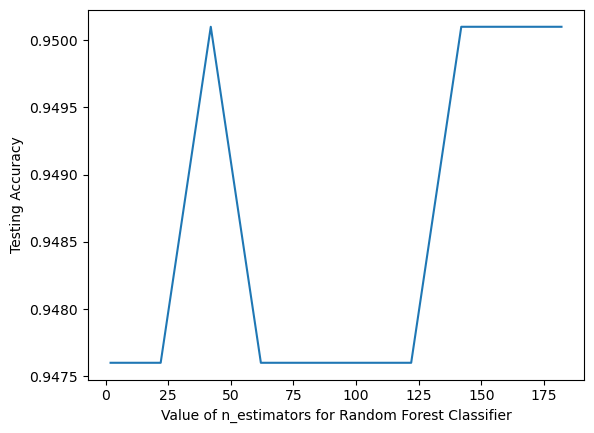

In [44]:
# Accuracy Graph (x-axis = n_estimators, y-axis = accuracy)

plt.plot(range(2, 202, jump), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [45]:
# Getting The Max Accuracy With Its N_Estimator

maxs = max(scores)
print("Random Forest Classifier Accuracy Score : ", maxs)

Random Forest Classifier Accuracy Score :  0.9501


*****Random Forest Gives More Accuracy but no need hyperparameter Tuning*****

In [46]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],      # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
# }

In [47]:
# # Create the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [48]:
# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters found: ", grid_search.best_params_)
# print("Best Cross-Validation Accuracy: ", grid_search.best_score_)


In [49]:
# # Get the best estimator
# best_rf_model = grid_search.best_estimator_

# # Predict on the test set
# y_pred = best_rf_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Set Accuracy with Best Parameters: {accuracy:.4f}")

*****Random Forest with pipline for categorical features and prediction*****

In [50]:
X=selected_features.drop('Winner',axis=1)
y=selected_features['Winner']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
transformer1 = ColumnTransformer([('ohe_first_second_venue', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), [0,1,2])], remainder = 'passthrough')

In [52]:
transformer2 = RandomForestClassifier(n_estimators=500)

In [53]:
pipe = Pipeline([('transformer1', transformer1), ('transformer2', transformer2)])

In [54]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_first_second_venue',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2])])),
                ('transformer2', RandomForestClassifier(n_estimators=500))])

In [55]:
# Check prediction

prediction = pd.DataFrame([['Pakistan', 'India', 'Dubai International Cricket Stadium']], columns = ['Bat First', 'Bat Second', 'Venue'])
winner = pipe.predict(prediction)

# Predict winner
print(str(winner[0]))

India


In [56]:
distinct_teams = selected_features['Bat First'].unique()

# Initialize a list and append distinct teams
teams = []
teams.extend(distinct_teams)

print("Distinct Teams:", teams)

Distinct Teams: ['Scotland', 'Estonia', 'Portugal', 'Kuwait', 'Swaziland', 'Belize', 'England', 'United Arab Emirates', 'Denmark', 'Bangladesh', 'Finland', 'India', 'Papua New Guinea', 'Afghanistan', 'Japan', 'Sri Lanka', 'Croatia', 'Ireland', 'New Zealand', 'Romania', 'Pakistan', 'Gibraltar', 'Rwanda', 'Malaysia', 'Malta', 'Cyprus', 'Nepal', 'Austria', 'Samoa', 'Nigeria', 'South Africa', 'Australia', 'Belgium', 'Oman', 'Bahamas', 'Seychelles', 'West Indies', 'Panama', 'Jersey', 'Zimbabwe', 'Hong Kong', 'Kenya', 'Uganda', 'Botswana', 'Ghana', 'Vanuatu', 'Cayman Islands', 'Bahrain', 'Malawi', 'Isle of Man', 'Norway', 'Singapore', 'Netherlands', 'Maldives', 'Hungary', 'Canada', 'St Helena', 'Tanzania', 'Serbia', 'Namibia', 'Germany', 'Bulgaria', 'Thailand', 'Lesotho', 'Czech Republic', 'Luxembourg', 'Spain', 'Bhutan', 'Slovenia', 'Indonesia', 'Argentina', 'Bermuda', 'Sweden', 'Fiji', 'Cameroon', 'France', 'Turkey', 'Mozambique', 'Qatar', 'Italy', 'Gambia', 'Cook Islands', 'Philippines', 

In [57]:
df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Bowler Runs Conceded',
       'Valid Ball'],
      dtype='object')

In [58]:
test_data = pd.DataFrame([['Pakistan', 'India', 'VenueX']], columns=['Bat First', 'Bat Second', 'Venue'])
print(pipe.predict_proba(test_data))
print(pipe.predict(test_data))

[[0.001277   0.         0.0023619  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00106122 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.9516381
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.004      0.         0.         0.         0.03166178
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.004      0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.004      0.        ]]
['India']


In [83]:
# Creating The GUI

# Setting Appearance And Theme To Make GUI Look Appealing
ctk.set_appearance_mode("Dark") 
ctk.set_default_color_theme("green") 


# Creating GUI Class
class App(ctk.CTk):
    
    # Making Function Which Is Called When Predict Is Pressed
    def button_event(self):
        teamA = self.teamAOptions.get()
        teamB = self.teamBOptions.get()
        venue = self.venueOptions.get()
        tossWin = self.tossWinOptions.get()
        
        if tossWin == teamA:
            prediction = pd.DataFrame([[teamA, teamB, venue]], columns = ['Bat First', 'Bat Second', 'Venue'])
        elif tossWin == teamB:
            prediction = pd.DataFrame([[teamB, teamA, venue]], columns = ['Bat First', 'Bat Second', 'Venue'])
            
        winner = pipe.predict(prediction)
        
        for i in range(101):
            self.after(1)
            self.progressBar.set(i/100)
            self.progressBar.update()
            
        self.predictionLabel.configure(text = str(winner[0]))
        
    # Making Function Which Is Called When DropDown Menu Is Clicked    
    def updateAllDropDown(self, choice):
        teamA = self.teamAOptions.get()
        teamB = self.teamBOptions.get()
        tempTeamsA = teams.copy()
        tempTeamsB = teams.copy()
        tempTeamsA.remove(teamB)
        tempTeamsB.remove(teamA)
        self.teamA.configure(values = tempTeamsA)
        self.teamB.configure(values = tempTeamsB)
        self.tossWin.configure(values = [teamA, teamB])
        self.tossWin.set(teamA)
            
    # Making Function Which Is Called When Window Is Closed
    def quit_me(self):
        self.quit()
        self.destroy()
        
    # Making Class Constructor
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Setting Window Title And Size
        self.title("T20I CRICKET PREDICTIONS MODEL")
        self.geometry("1000x500")
        
        
        # Making All Components (Labels/DropDown/Button/ProgressBar)
        self.titleLabel = ctk.CTkLabel(self, text = "T20I CRICKET PREDICTIONS MODEL", font = ("Arial", 40, "bold", "underline"), text_color = "White")
        self.titleLabel.place(relx = 0.5, rely = 0.1, anchor = ctk.N)
        
        self.teamALabel = ctk.CTkLabel(self, width = 150, text = "First Team : ", text_color = "White", font = ("Arial", 20))
        self.teamALabel.place(x = 100, rely = 0.3)
            
        self.teamAOptions = ctk.StringVar()
        self.teamA = ctk.CTkOptionMenu(self, variable = self.teamAOptions, width = 150, values = teams, font = ("Arial", 20), command = self.updateAllDropDown)
        self.teamA.place(x = 250, rely = 0.3)
        self.teamAOptions.set(teams[0])
        
        self.teamBLabel = ctk.CTkLabel(self, width = 150, text = "Second Team : ", text_color = "White", font = ("Arial", 20))
        self.teamBLabel.place(x = 600, rely = 0.3)
        
        self.teamBOptions = ctk.StringVar()
        self.teamB = ctk.CTkOptionMenu(self, variable = self.teamBOptions, width = 150, values = teams, font = ("Arial", 20), command = self.updateAllDropDown)
        self.teamB.place(x = 750, rely = 0.3)
        self.teamBOptions.set(teams[1])
        
        self.venueLabel = ctk.CTkLabel(self, width = 150, text = "Venue : ", text_color = "White", font = ("Arial", 20))
        self.venueLabel.place(x = 175, rely = 0.4)
        
        self.venueOptions = ctk.StringVar()
        self.venue = ctk.CTkOptionMenu(self, variable = self.venueOptions, width = 150, values = df['Venue'].unique(), font = ("Arial", 20))
        self.venue.place(x = 325, rely = 0.4)
        self.venueOptions.set(df['Venue'].unique()[0])
        
        self.tossWinLabel = ctk.CTkLabel(self, width = 150, text = "Toss : ", text_color = "White", font = ("Arial", 20))
        self.tossWinLabel.place(x = 525, rely = 0.4)
        
        self.tossWinOptions = ctk.StringVar()
        self.tossWin = ctk.CTkOptionMenu(self, variable = self.tossWinOptions, width = 150, values = teams, font = ("Arial", 20))
        self.tossWin.place(x = 675, rely = 0.4)
        self.tossWinOptions.set(self.teamAOptions.get())
              
        self.predictButton = ctk.CTkButton(self, width = 250, text = "Predict", command = self.button_event, font = ("Arial", 30))
        self.predictButton.place(x = 375, rely = 0.5)
        
        self.progressBar = ctk.CTkProgressBar(self, width = 800, mode = "determinate")
        self.progressBar.place(x = 100, rely = 0.7)
        self.progressBar.set(0)
        
        self.outcomeLabel = ctk.CTkLabel(self, width = 600, text = "The Team Which Is More Likely To Win Is : ", text_color = "White", font = ("Arial", 30))
        self.outcomeLabel.place(x = 125, rely = 0.8)
        
        self.predictionLabel = ctk.CTkLabel(self, width = 150, text = "", text_color = "White", font = ("Arial", 30))
        self.predictionLabel.place(x = 725, rely = 0.8)
        self.updateAllDropDown("HACK")
        
# Running The App (GUI)
if __name__ == "__main__":
    app = App()
    app.protocol("WM_DELETE_WINDOW", app.quit_me)
    app.mainloop()
        
# To check:

# Team 1 => Pakistan
# Team 2 => India
# Venue => Dubai International Stadium
# Toss Winner => India

# Winner Predict => Pakistan

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Check Above prediction is correct or not (As per Statistics)!!! 
  </span>
</div>

In [82]:
import pandas as pd
import customtkinter as ctk
from tkinter import ttk

df = pd.read_csv("ball_by_ball_it20.csv")

# Create GUI class

class CricketApp(ctk.CTk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Set window properties
        self.title("Cricket Match Statistics")
        self.geometry("1100x700")

        # Title label
        self.title_label = ctk.CTkLabel(self, text="Cricket Match Statistics Viewer", 
                                        font=("Arial", 24, "bold"))
        self.title_label.pack(pady=10)

        # Team selection frame
        self.selection_frame = ctk.CTkFrame(self)
        self.selection_frame.pack(pady=10, padx=10, fill="x")

        # Team A dropdown
        ctk.CTkLabel(self.selection_frame, text="Select Team A:", font=("Arial", 16)).grid(
            row=0, column=0, padx=15, pady=10
        )
        self.team_a_var = ctk.StringVar()
        self.team_a_menu = ctk.CTkOptionMenu(
            self.selection_frame, variable=self.team_a_var,
            values=df['Bat First'].unique().tolist()
        )
        self.team_a_menu.grid(row=0, column=1, padx=15, pady=10)

        # Team B dropdown
        ctk.CTkLabel(self.selection_frame, text="Select Team B:", font=("Arial", 16)).grid(
            row=0, column=2, padx=15, pady=10
        )
        self.team_b_var = ctk.StringVar()
        self.team_b_menu = ctk.CTkOptionMenu(
            self.selection_frame, variable=self.team_b_var,
            values=df['Bat Second'].unique().tolist()
        )
        self.team_b_menu.grid(row=0, column=3, padx=15, pady=10)

        # Toss Winner dropdown
        ctk.CTkLabel(self.selection_frame, text="Toss Winner:", font=("Arial", 16)).grid(
            row=1, column=0, padx=15, pady=10
        )
        self.toss_var = ctk.StringVar()
        self.toss_menu = ctk.CTkOptionMenu(
            self.selection_frame, variable=self.toss_var, values=[]
        )
        self.toss_menu.grid(row=1, column=1, padx=15, pady=10)

        # Ground dropdown
        ctk.CTkLabel(self.selection_frame, text="Select Ground:", font=("Arial", 16)).grid(
            row=1, column=2, padx=15, pady=10
        )
        self.ground_var = ctk.StringVar()
        self.ground_menu = ctk.CTkOptionMenu(
            self.selection_frame, variable=self.ground_var,
            values=df["Venue"].unique().tolist()
        )
        self.ground_menu.grid(row=1, column=3, padx=15, pady=10)

        # Search button
        self.search_button = ctk.CTkButton(
            self.selection_frame, text="Show Matches", command=self.show_matches
        )
        self.search_button.grid(row=1, column=4, padx=15, pady=10)

        # Table frame
        self.table_frame = ctk.CTkFrame(self)
        self.table_frame.pack(pady=20, padx=10, fill="both", expand=True)

        # Table widget
        self.tree = ttk.Treeview(self.table_frame, columns=("Date", "Venue", "Bat First", "Bat Second", "Winner"), 
                                 show="headings")
        
        # Define columns
        for col in self.tree['columns']:
            self.tree.heading(col, text=col)
            self.tree.column(col, anchor="center")

        self.tree.pack(fill="both", expand=True)

        # Update Toss Winner options when teams are selected
        self.team_a_var.trace("w", self.update_toss_options)
        self.team_b_var.trace("w", self.update_toss_options)

    def update_toss_options(self, *args):
        team_a = self.team_a_var.get()
        team_b = self.team_b_var.get()
        if team_a and team_b:
            self.toss_menu.configure(values=[team_a, team_b])
            self.toss_var.set("")  # Reset toss winner selection

    def show_matches(self):
    # Clear the table
        for row in self.tree.get_children():
            self.tree.delete(row)

        # Get selected teams, toss winner, and ground
        team_a = self.team_a_var.get()
        team_b = self.team_b_var.get()
        toss_winner = self.toss_var.get()
        ground = self.ground_var.get()

        # Filter matches
        filtered_matches = df[
            (((df["Bat First"] == team_a) & (df["Bat Second"] == team_b)) |
             ((df["Bat First"] == team_b) & (df["Bat Second"] == team_a))) &
            (df["Bat First"] == toss_winner) &
            (df["Venue"] == ground)
        ]

        # Remove duplicate dates, keeping the first occurrence
        filtered_matches_unique_dates = filtered_matches.drop_duplicates(subset="Date")

        # Display filtered matches or show "No matches found"
        if not filtered_matches_unique_dates.empty:
            for _, row in filtered_matches_unique_dates.iterrows():
                self.tree.insert("", "end", values=(
                    row["Date"], row["Venue"], row["Bat First"], row["Bat Second"], row["Winner"]
                ))
        else:
            # Show a message in the table if no matches are found
            self.tree.insert("", "end", values=("No matches found", "", "", "", ""))
        
        # Ensure the window closes properly
        self.protocol("WM_DELETE_WINDOW", self.on_close)
        
    def on_close(self):
        # Handle the window close event (to properly exit)
        self.quit()  # Stops the mainloop
        self.destroy()  # Destroys the window

# Running The App (GUI)
if __name__ == "__main__":
    app = CricketApp()
    app.mainloop()    
    
# Team 1 => Pakistan
# Team 2 => India
# Venue => Dubai International Stadium
# Toss Winner => India

# Winner Predict => Pakistan won 2 matches => played 2 matches

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Check the matches played between any two teams 
  </span>
</div>

In [61]:
import pandas as pd

df = pd.read_csv("ball_by_ball_it20.csv")

df.columns

Index(['Index', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [62]:
import pandas as pd

columns_of_interest = [
    "Date", "Venue", "Bat First", "Bat Second", "Winner", 
    "Total Batter Runs", "Total Non Striker Runs"
]

# Ensure selected columns exist
df = df[columns_of_interest]

# Get user input for teams
team1 = "Pakistan"
team2 = "India"

# Filter for matches involving the selected teams
filtered_matches = df[
    ((df["Bat First"] == team1) & (df["Bat Second"] == team2)) |
    ((df["Bat First"] == team2) & (df["Bat Second"] == team1))
]

# Display key statistics
stats_to_display = filtered_matches[[
    "Date", "Venue", "Bat First", 
    "Bat Second", "Winner"]]

display(stats_to_display)

,Date,Venue,Bat First,Bat Second,Winner
38951,9/24/2007,New Wanderers Stadium,India,Pakistan,India
38952,9/24/2007,New Wanderers Stadium,India,Pakistan,India
38953,9/24/2007,New Wanderers Stadium,India,Pakistan,India
38954,9/24/2007,New Wanderers Stadium,India,Pakistan,India
38955,9/24/2007,New Wanderers Stadium,India,Pakistan,India
...,...,...,...,...,...
417913,3/19/2016,Eden Gardens,Pakistan,India,India
417914,3/19/2016,Eden Gardens,Pakistan,India,India
417915,3/19/2016,Eden Gardens,Pakistan,India,India
417916,3/19/2016,Eden Gardens,Pakistan,India,India


In [63]:
import pandas as pd
import customtkinter as ctk
from tkinter import ttk

columns_of_interest = [
    "Date", "Venue", "Bat First", "Bat Second", "Winner", 
    "Total Batter Runs", "Total Non Striker Runs"
]

# Ensure selected columns exist
df = df[columns_of_interest]

# Create GUI class
class CricketApp(ctk.CTk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Set window properties
        self.title("Cricket Match Statistics")
        self.geometry("1000x600")

        # Title label
        self.title_label = ctk.CTkLabel(self, text="Cricket Match Statistics Viewer", 
                                        font=("Arial", 24, "bold"))
        self.title_label.pack(pady=10)

        # Team selection frame
        self.selection_frame = ctk.CTkFrame(self)
        self.selection_frame.pack(pady=10, padx=10, fill="x")

        # Team A dropdown
        ctk.CTkLabel(self.selection_frame, text="Select Team A:", font=("Arial", 16)).grid(row=0, column=0, padx=10)
        self.team_a_var = ctk.StringVar()
        self.team_a_menu = ctk.CTkOptionMenu(self.selection_frame, variable=self.team_a_var, 
                                             values=df['Bat First'].unique().tolist())
        self.team_a_menu.grid(row=0, column=1, padx=10)

        # Team B dropdown
        ctk.CTkLabel(self.selection_frame, text="Select Team B:", font=("Arial", 16)).grid(row=0, column=2, padx=10)
        self.team_b_var = ctk.StringVar()
        self.team_b_menu = ctk.CTkOptionMenu(self.selection_frame, variable=self.team_b_var, 
                                             values=df['Bat Second'].unique().tolist())
        self.team_b_menu.grid(row=0, column=3, padx=10)

        # Search button
        self.search_button = ctk.CTkButton(self.selection_frame, text="Show Matches", 
                                           command=self.show_matches)
        self.search_button.grid(row=0, column=4, padx=10)

        # Table frame
        self.table_frame = ctk.CTkFrame(self)
        self.table_frame.pack(pady=20, padx=10, fill="both", expand=True)

        # Table widget (excluding the 'First Inning Target' and 'Second Inning Target' columns)
        self.tree = ttk.Treeview(self.table_frame, columns=("Date", "Venue", "Bat First", "Bat Second", "Winner"), 
                                 show="headings")
        
        # Define columns
        for col in self.tree['columns']:
            self.tree.heading(col, text=col)
            self.tree.column(col, anchor="center")

        self.tree.pack(fill="both", expand=True)

    def show_matches(self):
        # Clear the table
        for row in self.tree.get_children():
            self.tree.delete(row)

        # Get selected teams
        team_a = self.team_a_var.get()
        team_b = self.team_b_var.get()

        # Filter matches
        filtered_matches = df[
            ((df["Bat First"] == team_a) & (df["Bat Second"] == team_b)) |
            ((df["Bat First"] == team_b) & (df["Bat Second"] == team_a))
        ]

        # Remove duplicate dates, keeping the first occurrence
        filtered_matches_unique_dates = filtered_matches.drop_duplicates(subset="Date")

        # Display filtered matches with unique dates in the table
        for _, row in filtered_matches_unique_dates.iterrows():
            self.tree.insert("", "end", values=(
                row["Date"], row["Venue"], row["Bat First"], row["Bat Second"], row["Winner"]
            ))
        
        # Ensure the window closes properly
        self.protocol("WM_DELETE_WINDOW", self.on_close)
        
    def on_close(self):
        # Handle the window close event (to properly exit)
        self.quit()  # Stops the mainloop
        self.destroy()  # Destroys the window

# Run the app
if __name__ == "__main__":
    app = CricketApp()
    app.mainloop()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    Applying Different Models
  </span>
</div>

In [64]:
# Split into X and y
# X => all features excluding target variable
# y => target feature only
import pandas as pd
df = pd.read_csv("ball_by_ball_it20.csv")
df.shape

(425119, 35)

In [65]:
df

,Index,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,3/26/2023,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425114,425114,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,2,TK Curran,...,New Zealand,0,11,2,9,2,NaN,NaN,0,1
425115,425115,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,3,TK Curran,...,New Zealand,0,12,2,10,2,NaN,NaN,1,1
425116,425116,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,...,New Zealand,0,2,12,3,10,NaN,NaN,0,1
425117,425117,1187667,11/5/2019,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,...,New Zealand,0,3,12,4,10,NaN,NaN,1,1


In [66]:
# one row for each match

df = df.groupby(['Date', 'Match ID']).apply(lambda x: x.sample(1)).reset_index(drop=True)
display(df)

,Index,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,284453,914219,1/10/2016,Eden Park,Sri Lanka,New Zealand,1,10,2,AD Mathews,...,New Zealand,1,19,28,11,25,NaN,NaN,4,1
1,346344,953347,1/10/2016,Sharjah Cricket Stadium,Afghanistan,Zimbabwe,2,15,1,H Masakadza,...,Afghanistan,0,48,35,38,31,NaN,NaN,0,1
2,393105,1202244,1/10/2020,Maharashtra Cricket Association Stadium,India,Sri Lanka,1,2,2,S Dhawan,...,India,0,1,6,4,5,NaN,NaN,0,1
3,197908,351694,1/11/2009,Melbourne Cricket Ground,Australia,South Africa,1,19,2,JR Hopes,...,Australia,0,7,1,8,1,NaN,NaN,2,1
4,26201,661695,1/11/2014,Eden Park,New Zealand,West Indies,2,16,3,S Badree,...,New Zealand,0,5,5,6,8,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,114764,1198237,9/8/2020,The Rose Bowl,England,Australia,1,19,4,CJ Jordan,...,Australia,1,3,26,4,16,NaN,NaN,1,1
1838,366447,1272096,9/8/2021,Shere Bangla National Stadium,New Zealand,Bangladesh,1,18,4,AY Patel,...,Bangladesh,1,3,41,5,43,NaN,NaN,1,1
1839,220000,1327279,9/8/2022,Dubai International Cricket Stadium,India,Afghanistan,2,20,1,Ibrahim Zadran,...,India,0,48,1,54,5,NaN,NaN,2,1
1840,36315,995469,9/9/2016,R Premadasa Stadium,Sri Lanka,Australia,2,14,3,UT Khawaja,...,Australia,1,3,6,9,14,NaN,NaN,1,1


In [67]:
X = df.drop('Winner',axis=1)
y = df['Winner']

In [68]:
# Label encoding on selected_features (Preprocessing)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()

for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
    
display(X)

,Index,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Balls Remaining,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,1234,404,0,37,82,59,0,9,1,26,...,64,1,19,28,11,25,38,29,4,1
1,1500,460,0,135,0,94,1,14,0,276,...,35,0,48,35,38,31,38,29,0,1
2,1703,857,1,87,36,82,0,1,1,691,...,112,0,1,6,4,5,38,29,0,1
3,858,55,2,96,2,79,0,18,1,383,...,10,0,7,1,8,1,38,29,2,1
4,114,309,3,37,59,93,1,15,2,683,...,27,0,5,5,6,8,38,29,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,499,780,1110,157,22,2,0,18,3,157,...,8,1,3,26,4,16,38,29,1,1
1838,1587,1020,1111,138,59,6,0,17,3,53,...,14,1,3,41,5,43,38,29,1,1
1839,954,1528,1112,35,36,0,1,19,0,321,...,5,0,48,1,54,5,38,29,2,1
1840,157,492,1113,118,82,2,1,13,2,829,...,39,1,3,6,9,14,38,29,1,1


In [69]:
from sklearn.model_selection import train_test_split

# Splitting into X_train, X_test, y_train, y_test (80% training and 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the selected features for a specified range 
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
display(X_train)

array([[ 0.34306821, -1.22066588, -0.68875384, ...,  0.19616199,
        -0.16354684,  0.21312505],
       [ 1.30977969, -0.05475826,  0.08366579, ...,  0.19616199,
        -0.78603908,  0.21312505],
       [-1.30203729, -1.55836404,  1.30899009, ...,  0.19616199,
         0.4589454 ,  0.21312505],
       ...,
       [-0.21472243, -1.20934639, -0.10556151, ...,  0.19616199,
        -0.78603908,  0.21312505],
       [ 0.30914851,  1.67335076,  0.98016889, ...,  0.19616199,
        -0.16354684,  0.21312505],
       [ 0.21115826, -1.59043593,  0.46212038, ...,  0.19616199,
        -0.16354684,  0.21312505]])

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    3. Applying SVC (for Classification) 
  </span>
</div>

In [70]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for SVR Model: {accuracy:.2f}")

Accuracy for SVR Model: 0.11


In [71]:
# Classification Report

report = classification_report(y_test, y_pred, zero_division=0)
print(report)


                          precision    recall  f1-score   support

             Afghanistan       0.05      0.10      0.07        10
               Argentina       0.00      0.00      0.00         1
               Australia       0.22      0.21      0.22        19
                 Austria       0.00      0.00      0.00         3
                 Bahamas       0.00      0.00      0.00         1
                 Bahrain       0.00      0.00      0.00         4
              Bangladesh       0.00      0.00      0.00        12
                 Belgium       0.00      0.00      0.00         3
                 Bermuda       0.00      0.00      0.00         4
                Botswana       0.00      0.00      0.00         3
                Bulgaria       0.00      0.00      0.00         4
                  Canada       0.00      0.00      0.00         6
          Cayman Islands       0.00      0.00      0.00         1
                   China       0.00      0.00      0.00         1
         

D:\New folder\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


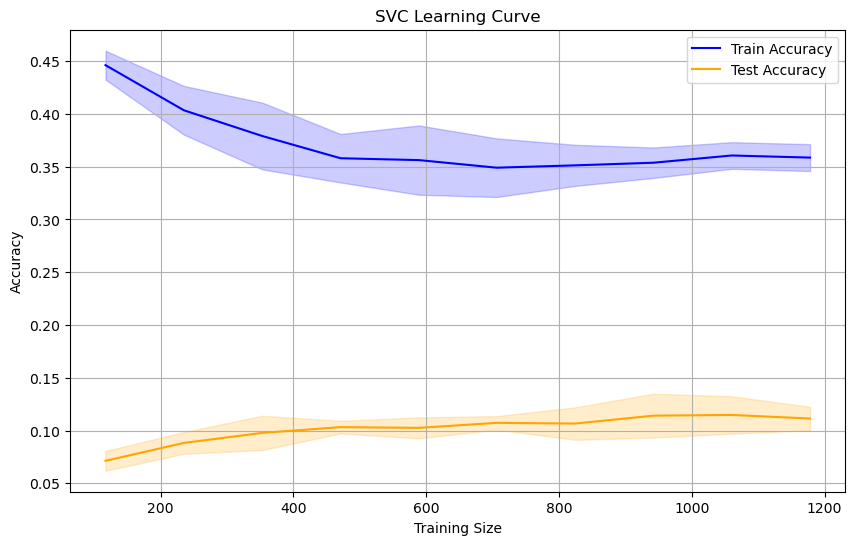

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

model = SVC(kernel='rbf', random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Train Accuracy", color='blue')
plt.plot(train_sizes, test_mean, label="Test Accuracy", color='orange')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
plt.title('SVC Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    4. Applying XGBOOST
  </span>
</div>

In [73]:
# XGBoost Implementation

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [74]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [75]:
accuracy_test = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)

print("\nAccuracy score using XGBoost on test data: ", round(accuracy_test * 100, 2), "%")
print("Accuracy score using XGBoost on training data: ", round(accuracy_train * 100, 2), "%")


Accuracy score using XGBoost on test data:  66.94 %
Accuracy score using XGBoost on training data:  92.53 %


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy
train_accuracy = []
test_accuracy = []

# Train and evaluate model for different number of estimators (1 to 100)
for n_estimators in range(1, 10, 2):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.01, random_state=1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train and test data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

print("Train accuracies: ", train_accuracy)
print("\nTest accuracies: ", test_accuracy)

Train accuracies:  [0.13306177868295996, 0.3340122199592668, 0.5261371350984385, 0.5919891378139851, 0.6184657162253904]

Test accuracies:  [0.0948509485094851, 0.2764227642276423, 0.4092140921409214, 0.45799457994579945, 0.4796747967479675]


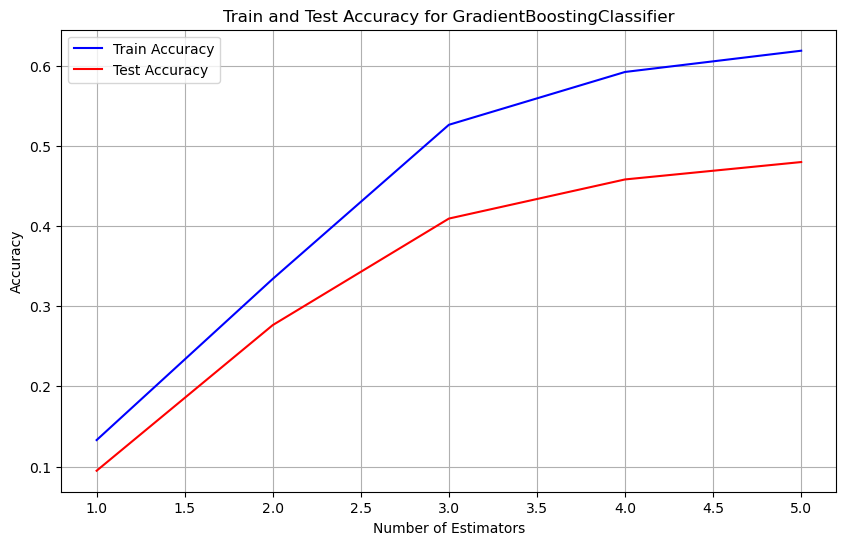

In [77]:
# Plot the accuracy graphs

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), train_accuracy, label="Train Accuracy", color='blue')
plt.plot(range(1, 6), test_accuracy, label="Test Accuracy", color='red')
plt.title("Train and Test Accuracy for GradientBoostingClassifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

<div style="font-family: 'Open Sans'; font-size: 26px; color: #FF6961; font-weight: bold; 
     transition: color 0.3s; margin-bottom: 20px;">
  <span onmouseover="this.style.color='#FF6347'" onmouseout="this.style.color='##FF6961'">
    5. Applying AdaBoost
  </span>
</div>

In [78]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=9, random_state=42)

In [79]:
accuracy_test = model.score(X_test, y_test)
accuracy_train = model.score(X_train, y_train)

print("\nAccuracy score using AdaBoost on test data: ", round(accuracy_test * 100, 2), "%")
print("Accuracy score using AdaBoost on training data: ", round(accuracy_train * 100, 2), "%")


Accuracy score using AdaBoost on test data:  9.21 %
Accuracy score using AdaBoost on training data:  10.39 %


In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy
train_accuracy = []
test_accuracy = []

# Train and evaluate model for different number of estimators (1 to 100)
for n_estimators in range(1, 24, 2):
    model = AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME', random_state=42)

    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train and test data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

print("Train accuracies: ", train_accuracy)
print("\nTest accuracies: ", test_accuracy)

Train accuracies:  [0.10047522063815342, 0.10047522063815342, 0.10251188051595383, 0.10251188051595383, 0.10386965376782077, 0.10386965376782077, 0.10319076714188731, 0.08010862186014936, 0.08010862186014936, 0.08010862186014936, 0.08010862186014936, 0.08010862186014936]

Test accuracies:  [0.08672086720867209, 0.08672086720867209, 0.08672086720867209, 0.08672086720867209, 0.0921409214092141, 0.0921409214092141, 0.0921409214092141, 0.07046070460704607, 0.07046070460704607, 0.07046070460704607, 0.07046070460704607, 0.07046070460704607]


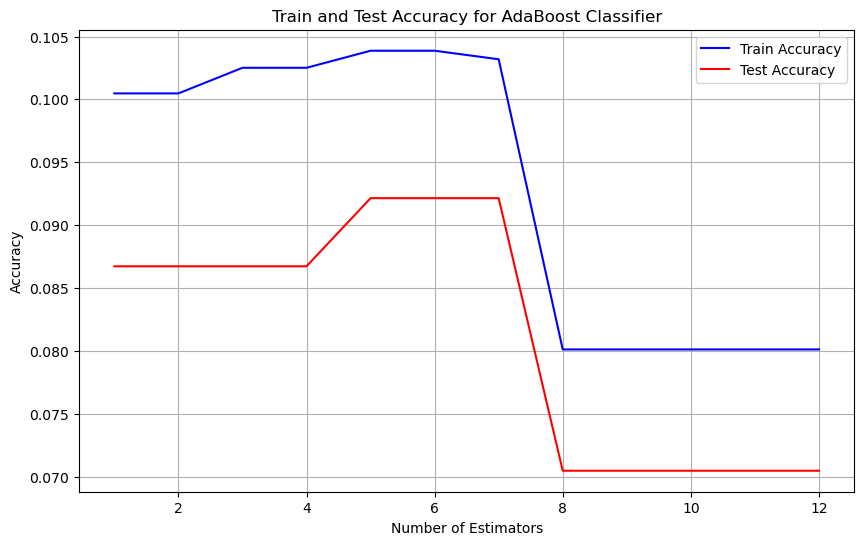

In [81]:
# Plot the accuracy graphs

plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), train_accuracy, label="Train Accuracy", color='blue')
plt.plot(range(1, 13), test_accuracy, label="Test Accuracy", color='red')
plt.title("Train and Test Accuracy for AdaBoost Classifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()